In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [5]:
from sklearn.preprocessing import LabelEncoder


def convert_category_into_integer(df: pd.DataFrame, columns: list):

    label_encoders = {}  # 각 열의 LabelEncoder 객체를 저장할 딕셔너리입니다.
    
    for column in columns:
        # 각 열에 대해 LabelEncoder 객체를 생성합니다.
        label_encoder = LabelEncoder()
        
        # LabelEncoder를 사용하여 해당 열의 범주형 데이터를 정수형으로 변환합니다.
        df.loc[:, column] = label_encoder.fit_transform(df[column])
        
        # 변환된 LabelEncoder 객체를 딕셔너리에 저장합니다.
        label_encoders.update({column: label_encoder})
    
    # 변환된 데이터프레임과 LabelEncoder 객체를 포함하는 딕셔너리를 반환합니다.
    return df, label_encoders

In [6]:
data = pd.read_csv(r'C:\Users\USER\Desktop\repro\project2_Team1\project2\data\train.csv')

In [4]:
data = data.dropna()

In [ ]:
data, _ = convert_category_into_integer(data, ('Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus'))

In [ ]:
data[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']]=data[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']].astype(int)

In [5]:
Churn1 =  data[data['Churn']==1]
Churn0 =  data[data['Churn']==0]

In [11]:
data

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


In [17]:
Churn1 =  data[data['Churn']=='Yes']
Churn0 =  data[data['Churn']=='No']

<Axes: xlabel='MonthlyRevenue', ylabel='Density'>

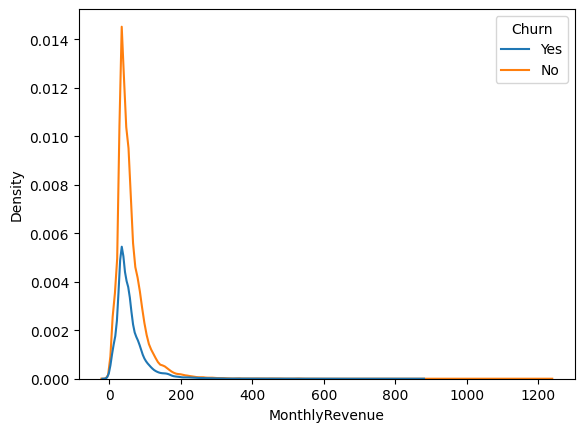

In [9]:
sns.kdeplot(x="MonthlyRevenue", data=data,hue='Churn')

<Axes: xlabel='MonthlyRevenue', ylabel='Density'>

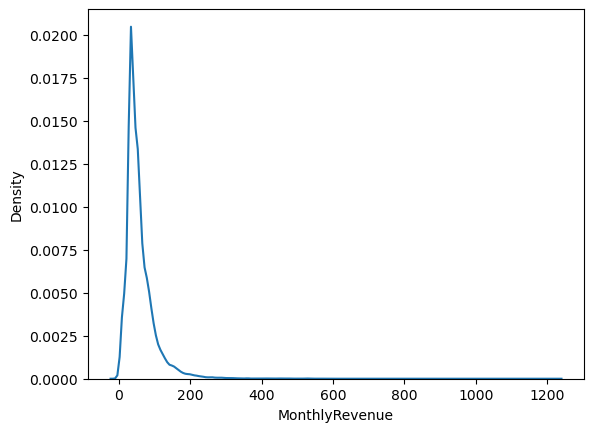

In [20]:
sns.kdeplot(x="MonthlyRevenue", data=Churn0)

<Axes: xlabel='MonthlyMinutes', ylabel='Density'>

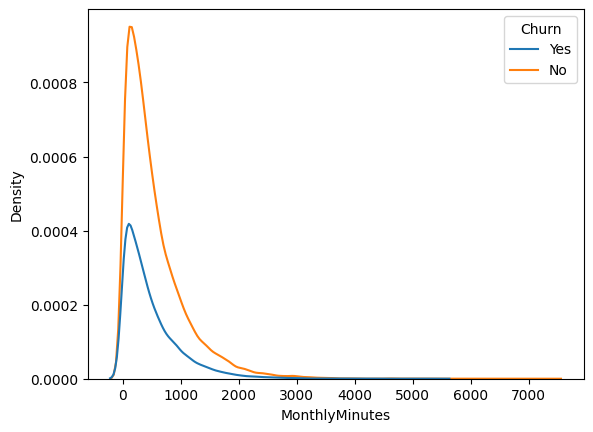

In [10]:
sns.kdeplot(x="MonthlyMinutes", data=data,hue='Churn')

<Axes: xlabel='MonthlyMinutes', ylabel='Density'>

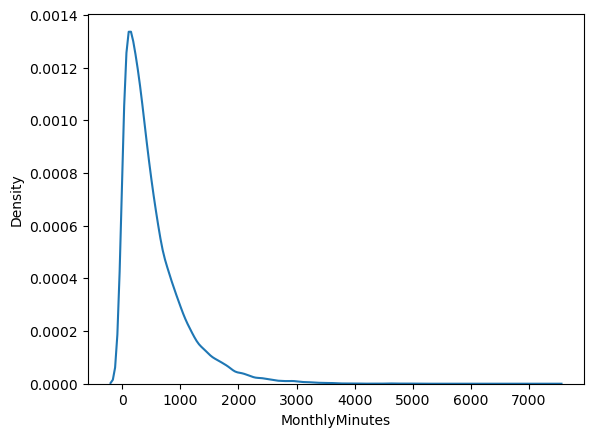

In [22]:
sns.kdeplot(x="MonthlyMinutes", data=Churn0)

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

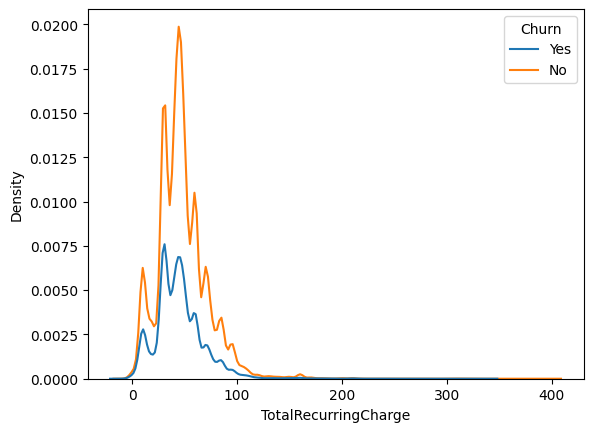

In [11]:
sns.kdeplot(x="TotalRecurringCharge", data=data,hue='Churn')

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

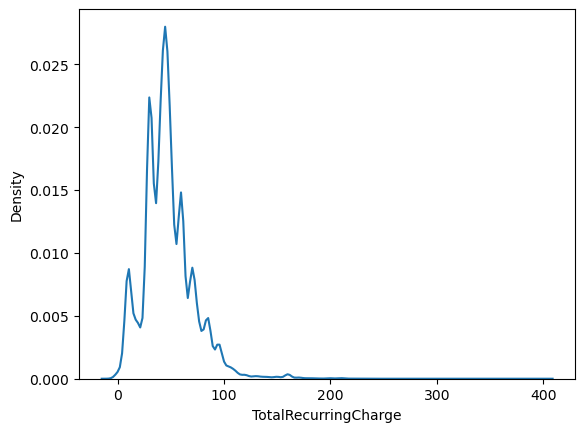

In [24]:
sns.kdeplot(x="TotalRecurringCharge", data=Churn0)

<Axes: xlabel='DirectorAssistedCalls', ylabel='Density'>

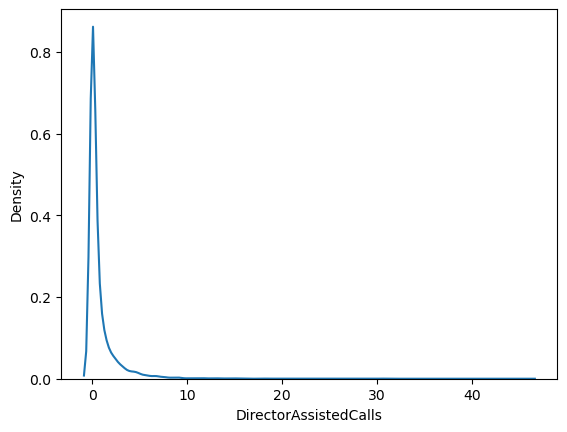

In [25]:
sns.kdeplot(x="DirectorAssistedCalls", data=Churn1)

<Axes: xlabel='DirectorAssistedCalls', ylabel='Density'>

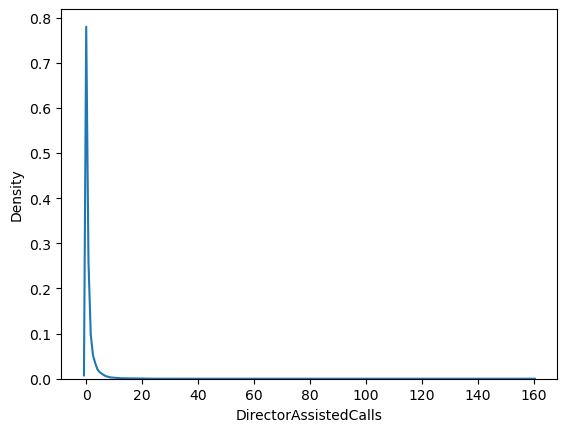

In [26]:
sns.kdeplot(x="DirectorAssistedCalls", data=Churn0)

<Axes: xlabel='OverageMinutes', ylabel='Density'>

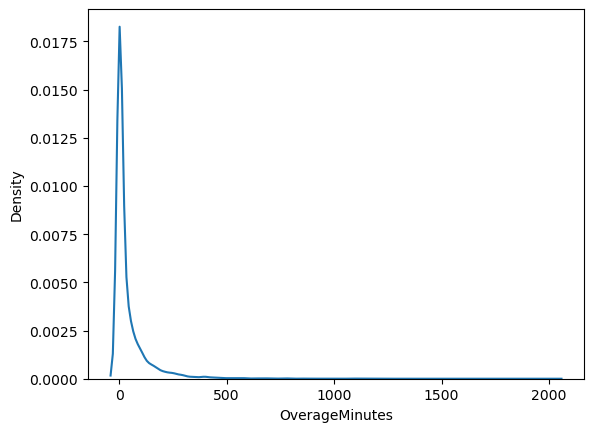

In [27]:
sns.kdeplot(x="OverageMinutes", data=Churn1)

<Axes: xlabel='OverageMinutes', ylabel='Density'>

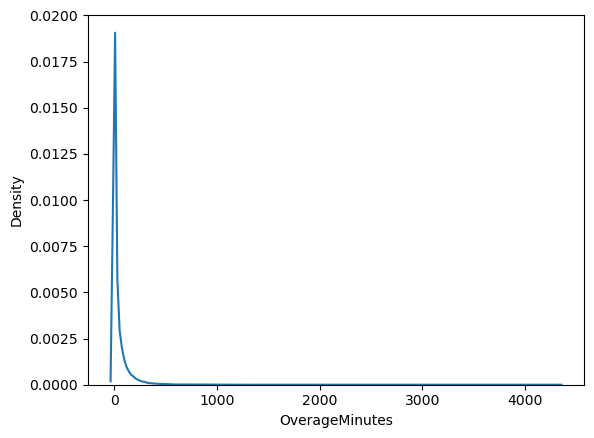

In [28]:
sns.kdeplot(x="OverageMinutes", data=Churn0)

<Axes: xlabel='RoamingCalls', ylabel='Density'>

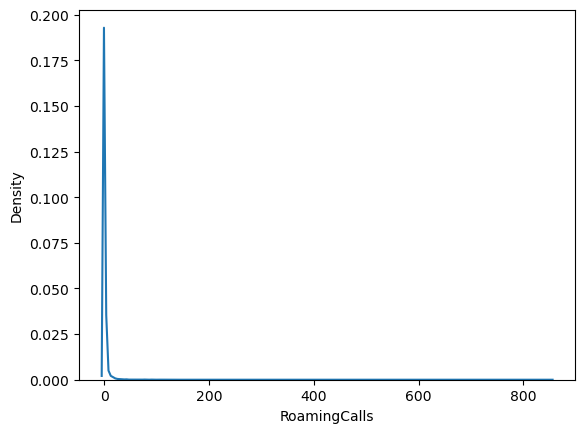

In [29]:
sns.kdeplot(x="RoamingCalls", data=Churn1)

<Axes: xlabel='RoamingCalls', ylabel='Density'>

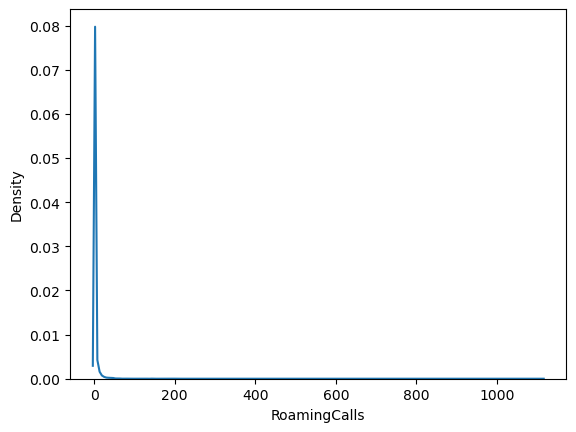

In [30]:
sns.kdeplot(x="RoamingCalls", data=Churn0)

<Axes: xlabel='PercChangeMinutes', ylabel='Density'>

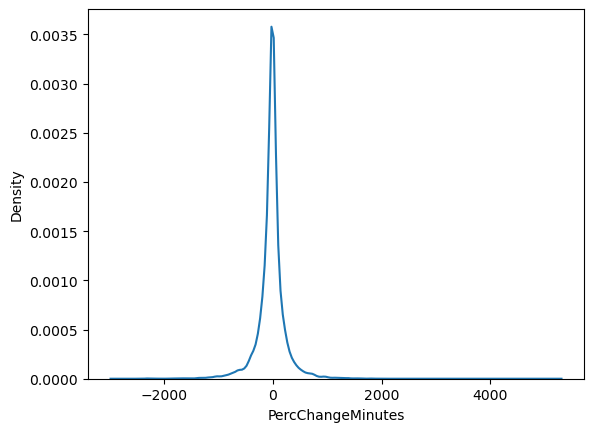

In [31]:
sns.kdeplot(x="PercChangeMinutes", data=Churn1)

<Axes: xlabel='PercChangeMinutes', ylabel='Density'>

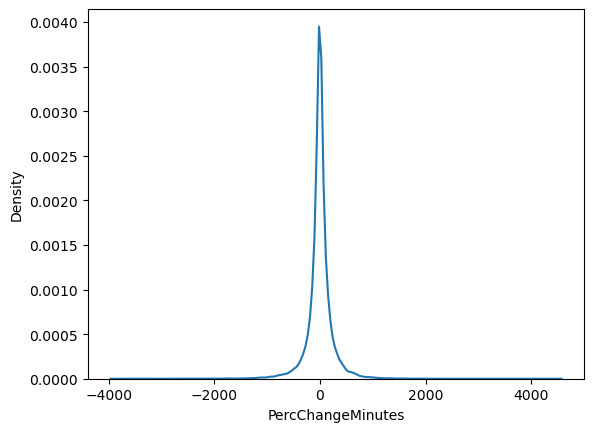

In [32]:
sns.kdeplot(x="PercChangeMinutes", data=Churn0)

<Axes: xlabel='PercChangeRevenues', ylabel='Density'>

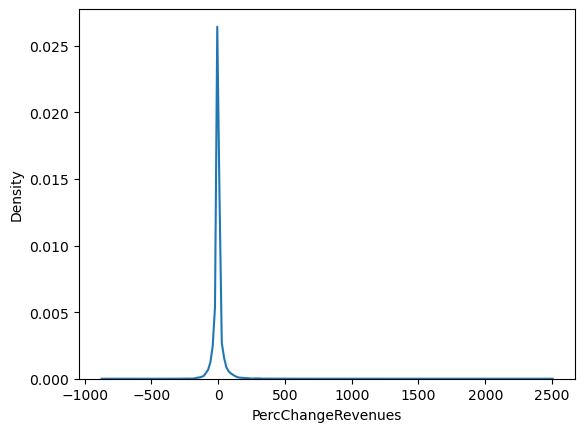

In [33]:
sns.kdeplot(x="PercChangeRevenues", data=Churn1)

<Axes: xlabel='PercChangeRevenues', ylabel='Density'>

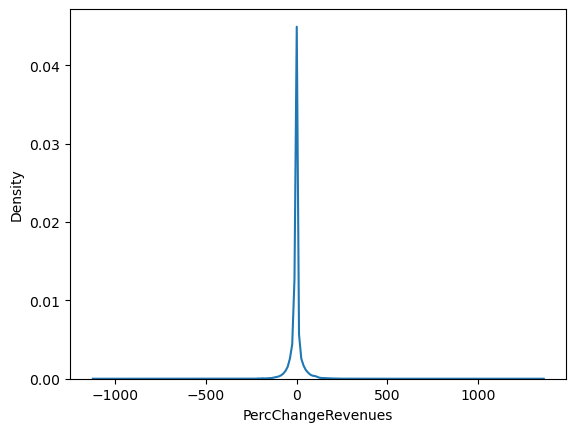

In [34]:
sns.kdeplot(x="PercChangeRevenues", data=Churn0)

<Axes: xlabel='DroppedCalls', ylabel='Density'>

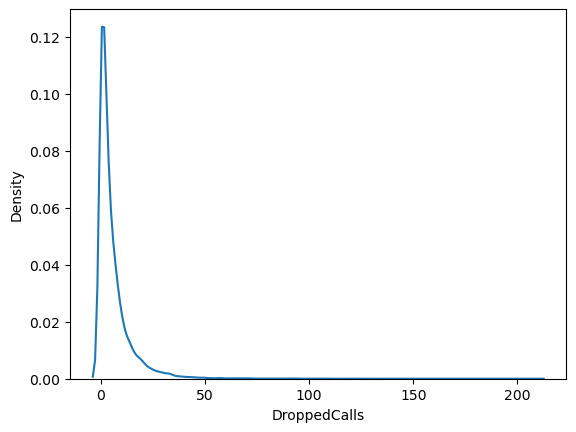

In [35]:
sns.kdeplot(x="DroppedCalls", data=Churn1)

<Axes: xlabel='DroppedCalls', ylabel='Density'>

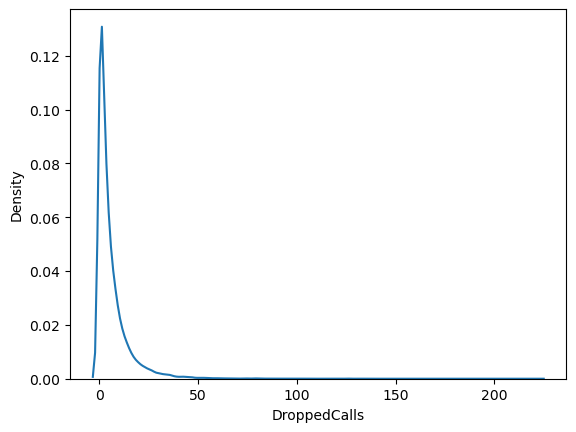

In [36]:
sns.kdeplot(x="DroppedCalls", data=Churn0)

<Axes: xlabel='BlockedCalls', ylabel='Density'>

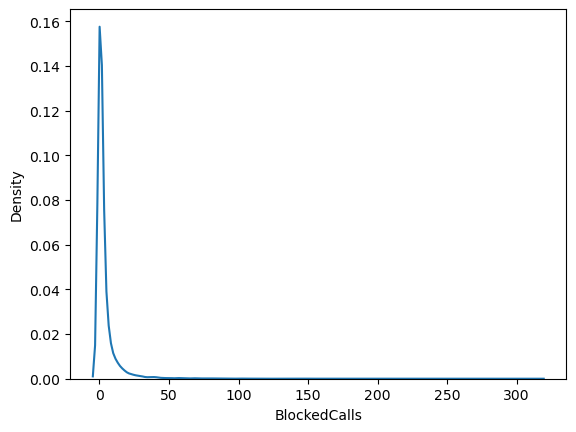

In [37]:
sns.kdeplot(x="BlockedCalls", data=Churn1)

<Axes: xlabel='BlockedCalls', ylabel='Density'>

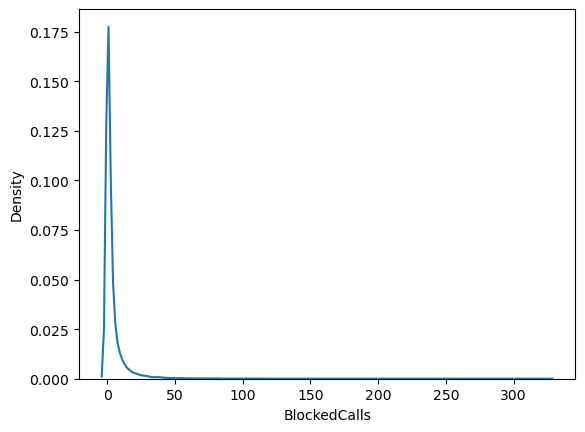

In [38]:
sns.kdeplot(x="BlockedCalls", data=Churn0)

<Axes: xlabel='UnansweredCalls', ylabel='Density'>

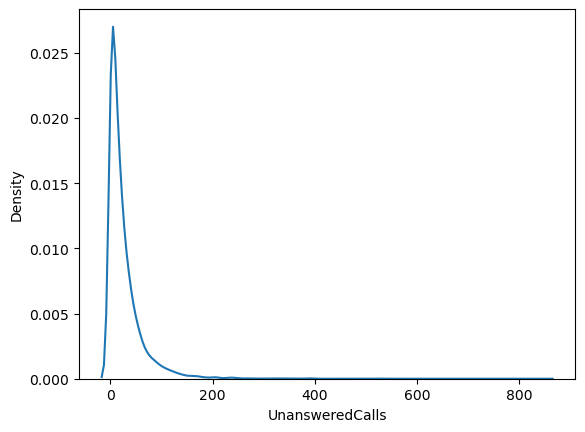

In [39]:
sns.kdeplot(x="UnansweredCalls", data=Churn1)

<Axes: xlabel='UnansweredCalls', ylabel='Density'>

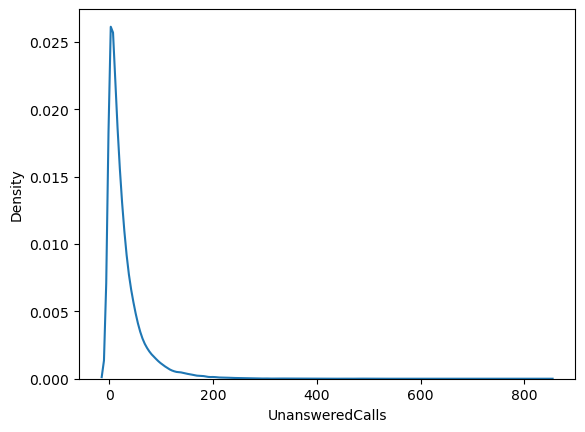

In [40]:
sns.kdeplot(x="UnansweredCalls", data=Churn0)

<Axes: xlabel='CustomerCareCalls', ylabel='Density'>

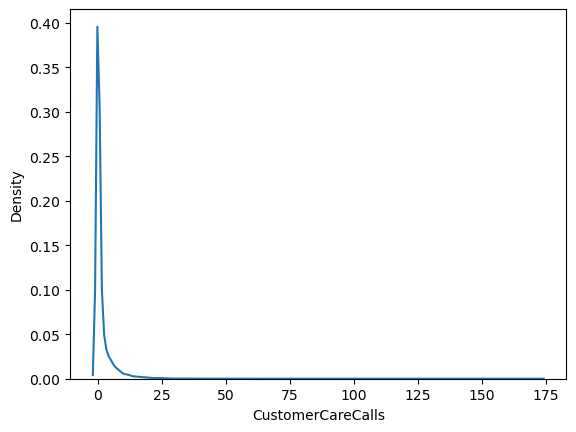

In [41]:
sns.kdeplot(x="CustomerCareCalls", data=Churn1)

<Axes: xlabel='CustomerCareCalls', ylabel='Density'>

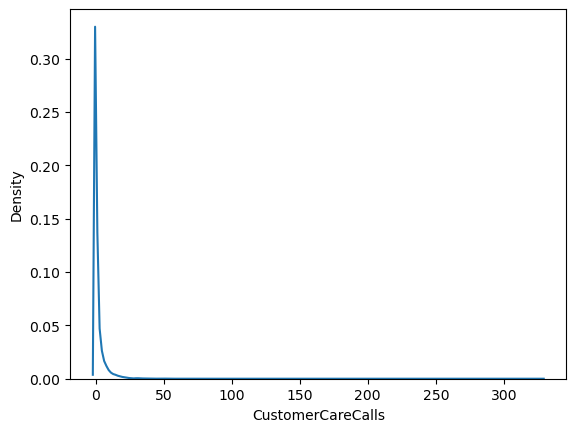

In [42]:
sns.kdeplot(x="CustomerCareCalls", data=Churn0)

<Axes: xlabel='ThreewayCalls', ylabel='Density'>

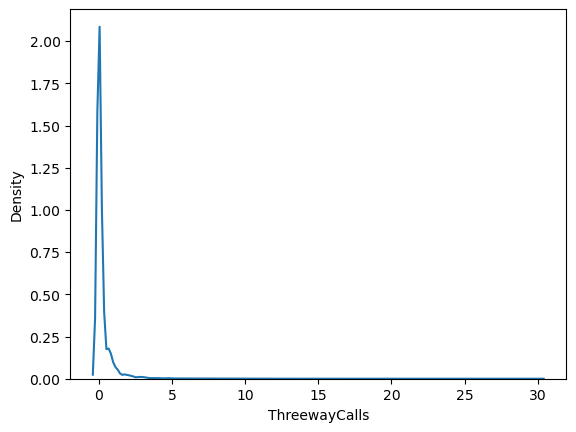

In [43]:
sns.kdeplot(x="ThreewayCalls", data=Churn1)

<Axes: xlabel='ThreewayCalls', ylabel='Density'>

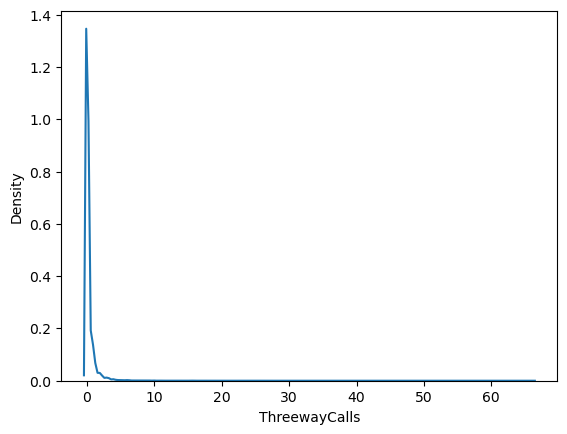

In [44]:
sns.kdeplot(x="ThreewayCalls", data=Churn0)

<Axes: xlabel='ReceivedCalls', ylabel='Density'>

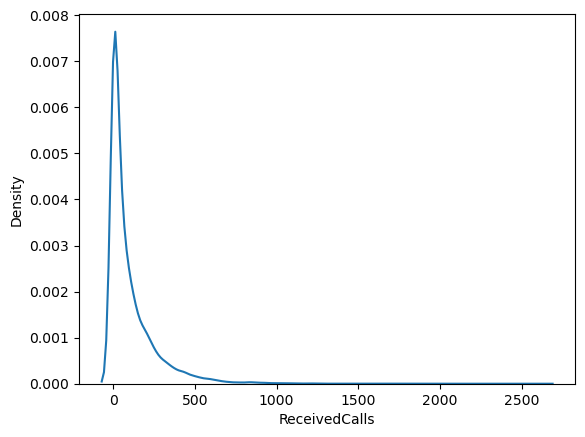

In [45]:
sns.kdeplot(x="ReceivedCalls", data=Churn1)

<Axes: xlabel='ReceivedCalls', ylabel='Density'>

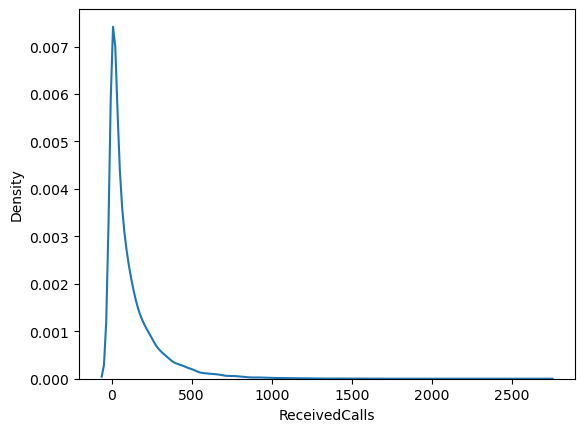

In [46]:
sns.kdeplot(x="ReceivedCalls", data=Churn0)

<Axes: xlabel='OutboundCalls', ylabel='Density'>

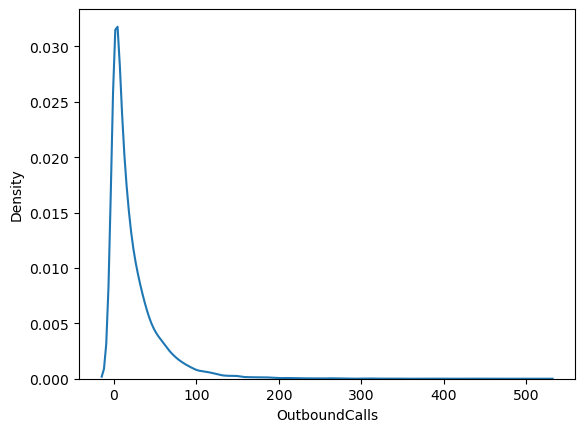

In [47]:
sns.kdeplot(x="OutboundCalls", data=Churn1)

<Axes: xlabel='OutboundCalls', ylabel='Density'>

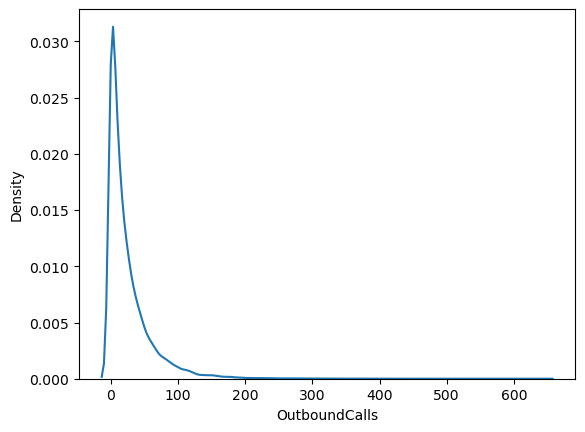

In [48]:
sns.kdeplot(x="OutboundCalls", data=Churn0)

<Axes: xlabel='InboundCalls', ylabel='Density'>

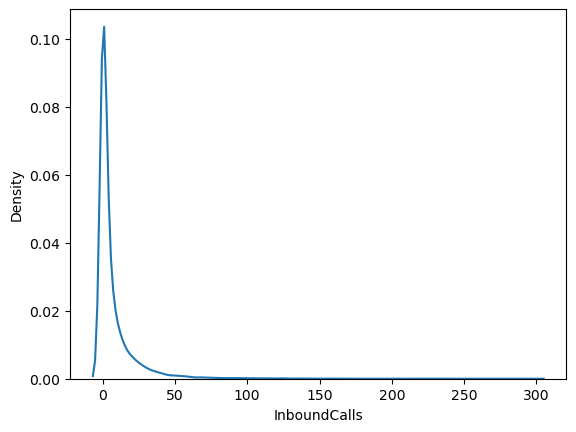

In [49]:
sns.kdeplot(x="InboundCalls", data=Churn1)

<Axes: xlabel='InboundCalls', ylabel='Density'>

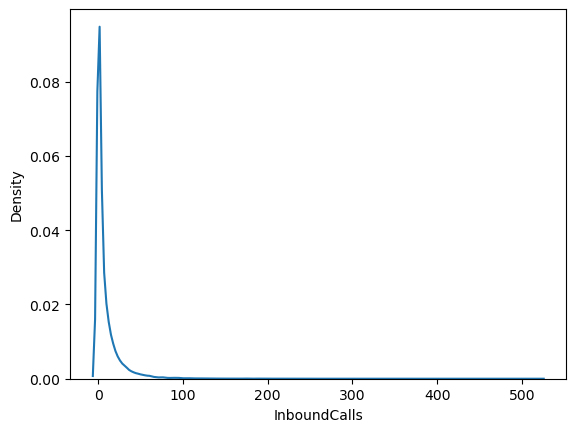

In [50]:
sns.kdeplot(x="InboundCalls", data=Churn0)

<Axes: xlabel='PeakCallsInOut', ylabel='Density'>

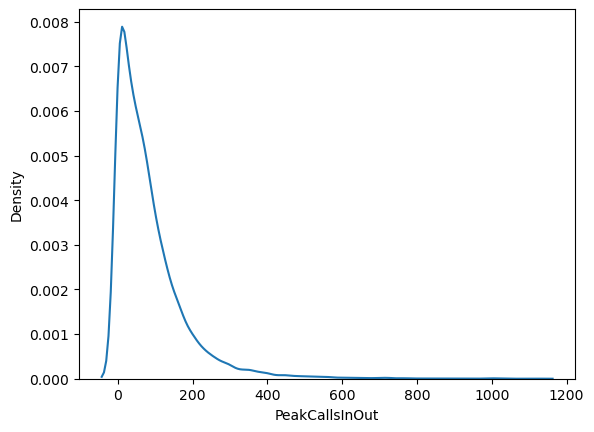

In [51]:
sns.kdeplot(x="PeakCallsInOut", data=Churn1)

<Axes: xlabel='PeakCallsInOut', ylabel='Density'>

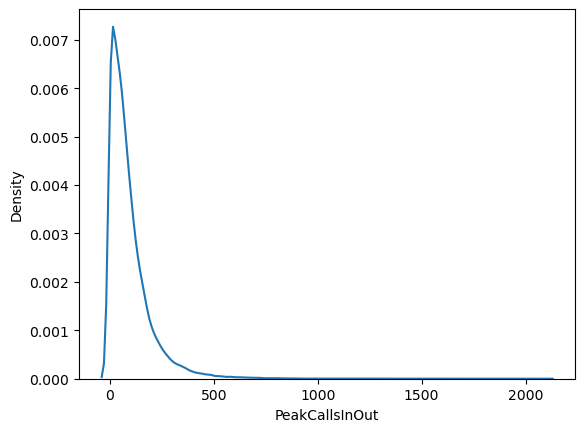

In [52]:
sns.kdeplot(x="PeakCallsInOut", data=Churn0)

<Axes: xlabel='OffPeakCallsInOut', ylabel='Density'>

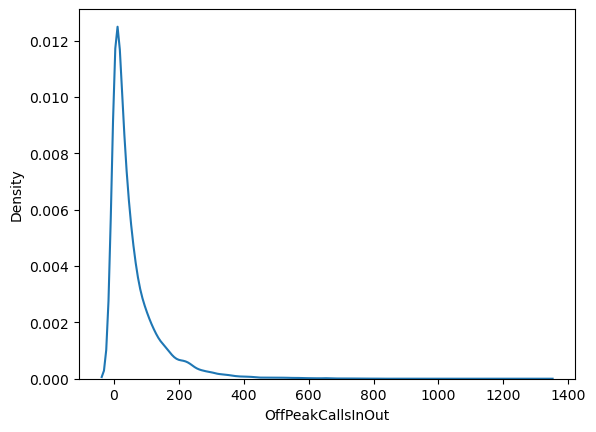

In [53]:
sns.kdeplot(x="OffPeakCallsInOut", data=Churn1)

<Axes: xlabel='OffPeakCallsInOut', ylabel='Density'>

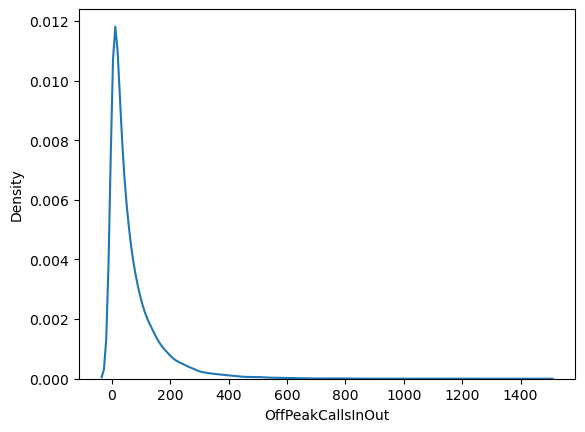

In [54]:
sns.kdeplot(x="OffPeakCallsInOut", data=Churn0)

<Axes: xlabel='DroppedBlockedCalls', ylabel='Density'>

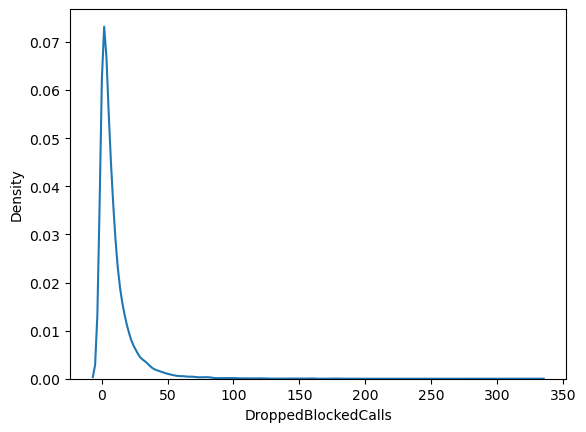

In [55]:
sns.kdeplot(x="DroppedBlockedCalls", data=Churn1)

<Axes: xlabel='DroppedBlockedCalls', ylabel='Density'>

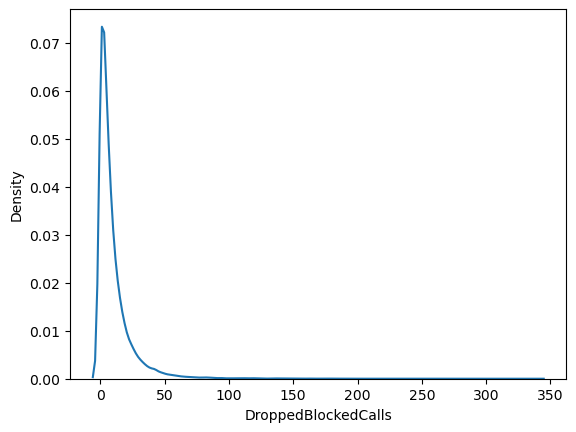

In [56]:
sns.kdeplot(x="DroppedBlockedCalls", data=Churn0)

<Axes: xlabel='CallForwardingCalls', ylabel='Density'>

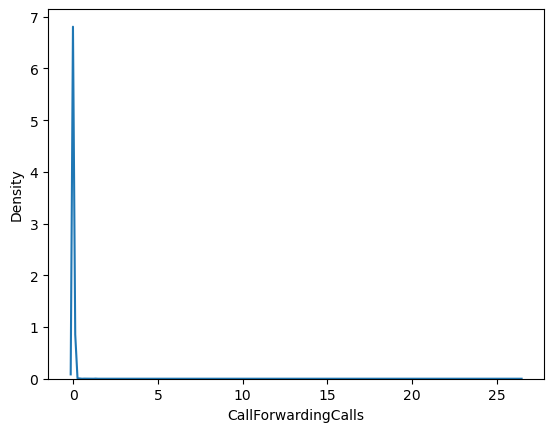

In [57]:
sns.kdeplot(x="CallForwardingCalls", data=Churn1)

<Axes: xlabel='CallForwardingCalls', ylabel='Density'>

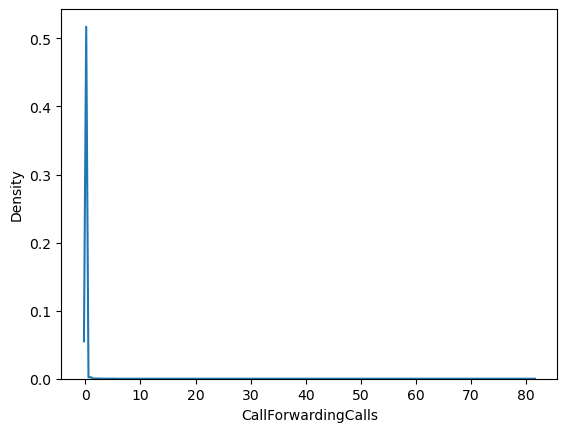

In [58]:
sns.kdeplot(x="CallForwardingCalls", data=Churn0)

<Axes: xlabel='CallWaitingCalls', ylabel='Density'>

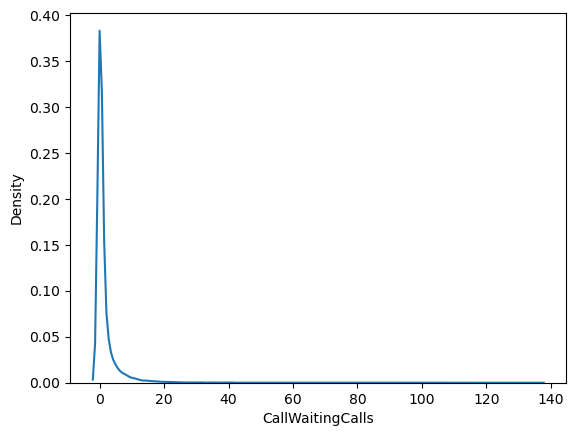

In [59]:
sns.kdeplot(x="CallWaitingCalls", data=Churn1)

<Axes: xlabel='CallWaitingCalls', ylabel='Density'>

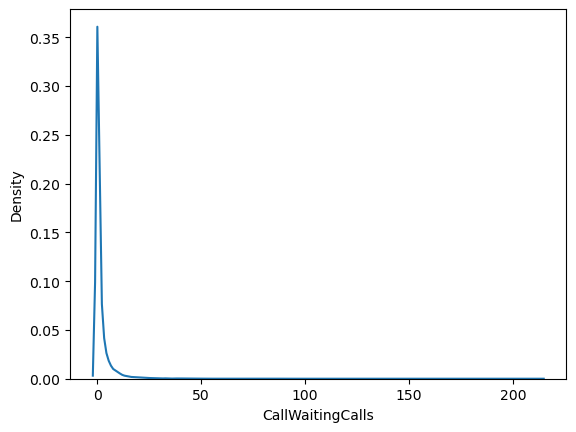

In [60]:
sns.kdeplot(x="CallWaitingCalls", data=Churn0)

<Axes: xlabel='MonthsInService', ylabel='Density'>

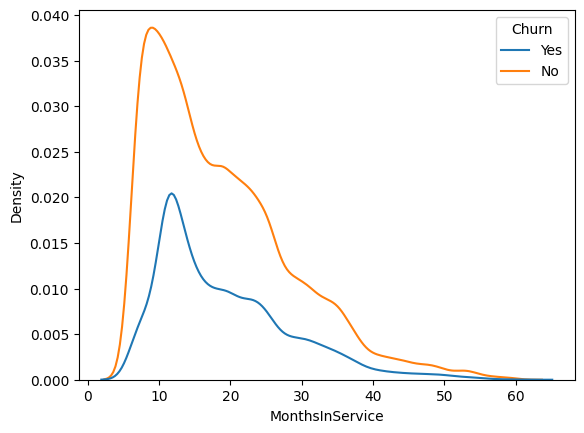

In [12]:
sns.kdeplot(x="MonthsInService", data=data,hue='Churn')

<Axes: xlabel='MonthsInService', ylabel='Density'>

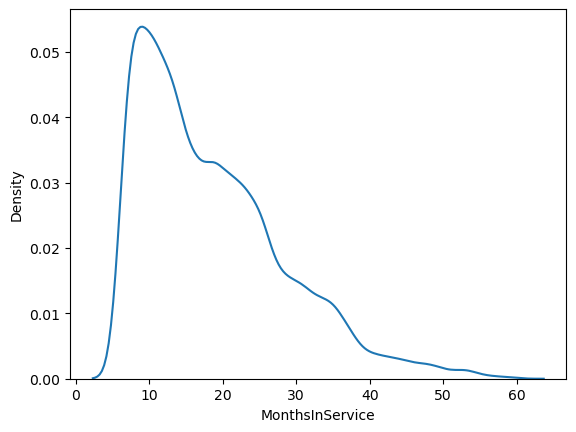

In [62]:
sns.kdeplot(x="MonthsInService", data=Churn0)

<Axes: xlabel='UniqueSubs', ylabel='Density'>

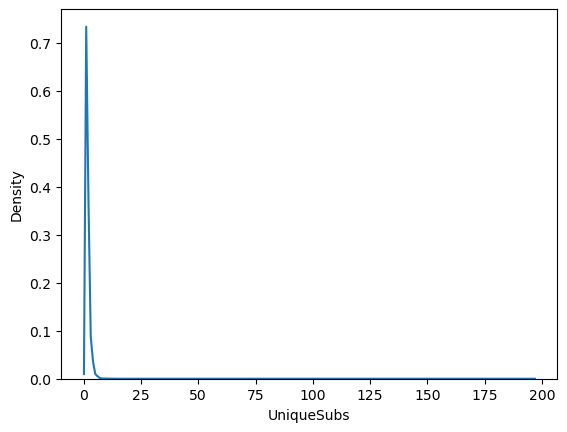

In [63]:
sns.kdeplot(x="UniqueSubs", data=Churn1)

<Axes: xlabel='UniqueSubs', ylabel='Density'>

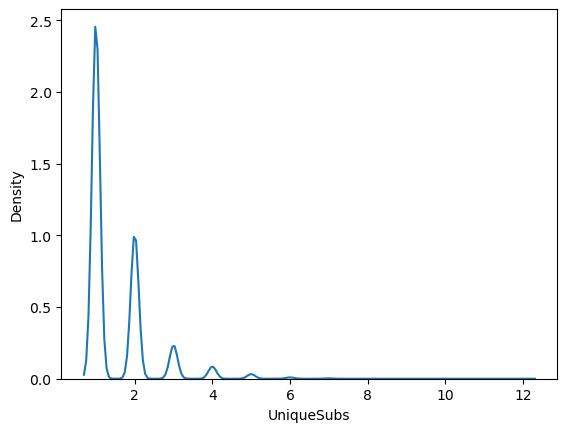

In [64]:
sns.kdeplot(x="UniqueSubs", data=Churn0)

<Axes: xlabel='ActiveSubs', ylabel='Density'>

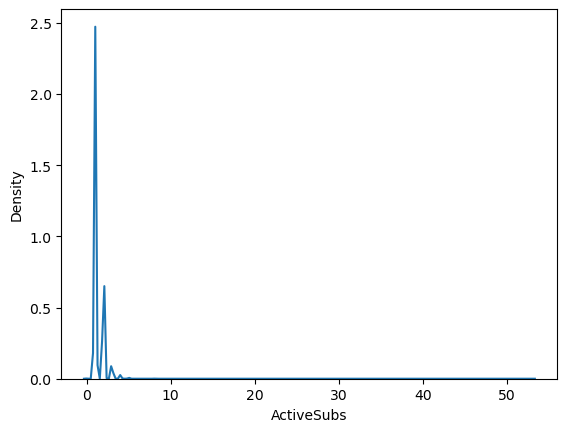

In [65]:
sns.kdeplot(x="ActiveSubs", data=Churn1)

<Axes: xlabel='ActiveSubs', ylabel='Density'>

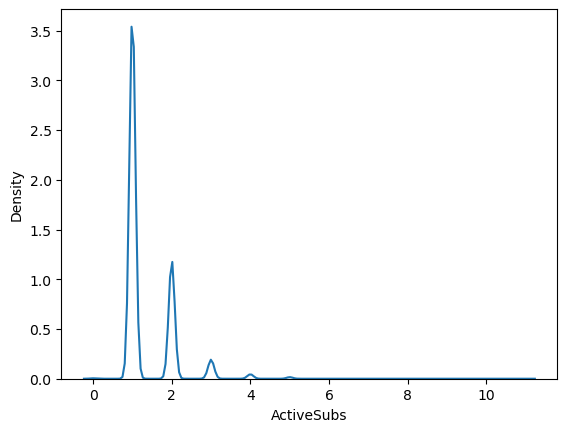

In [66]:
sns.kdeplot(x="ActiveSubs", data=Churn0)

<Axes: xlabel='ServiceArea', ylabel='count'>

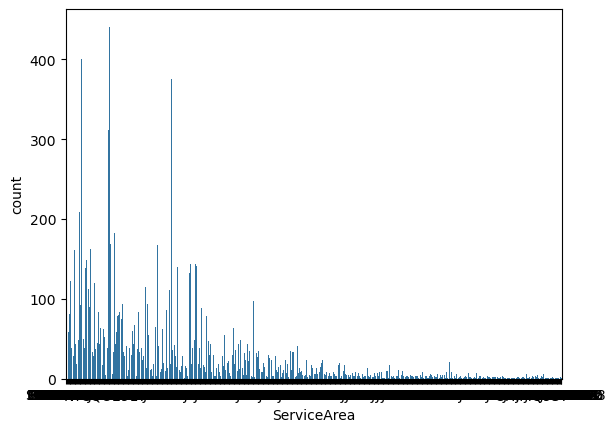

In [68]:
sns.countplot(x="ServiceArea", data=Churn1)

<Axes: xlabel='ServiceArea', ylabel='count'>

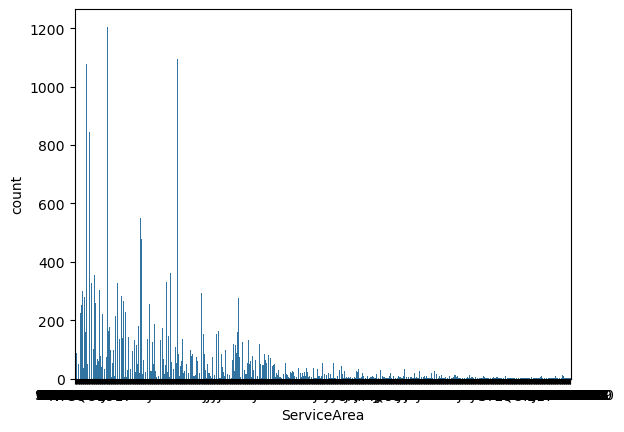

In [69]:

sns.countplot(x="ServiceArea", data=Churn0)

<Axes: xlabel='Handsets', ylabel='Density'>

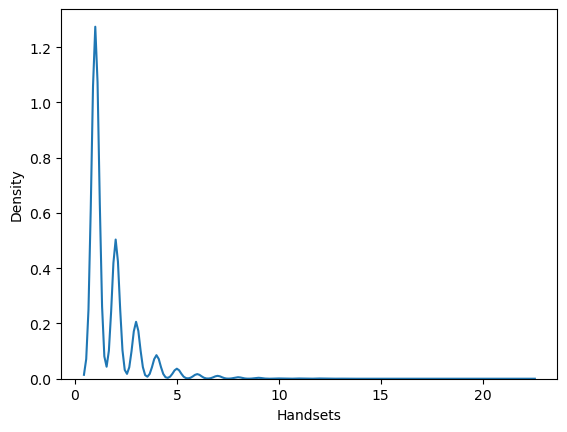

In [70]:
sns.kdeplot(x="Handsets", data=Churn1)

<Axes: xlabel='Handsets', ylabel='Density'>

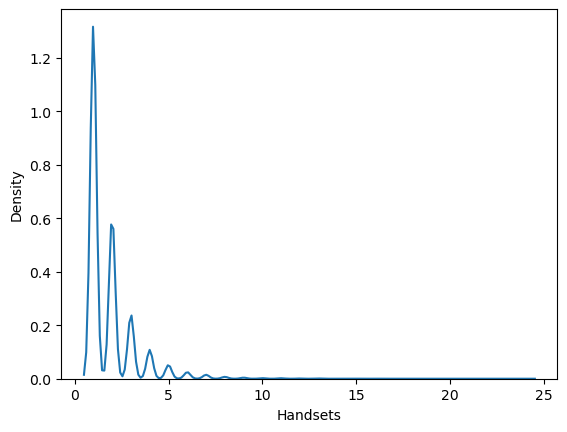

In [71]:
sns.kdeplot(x="Handsets", data=Churn0)

<Axes: xlabel='HandsetModels', ylabel='Density'>

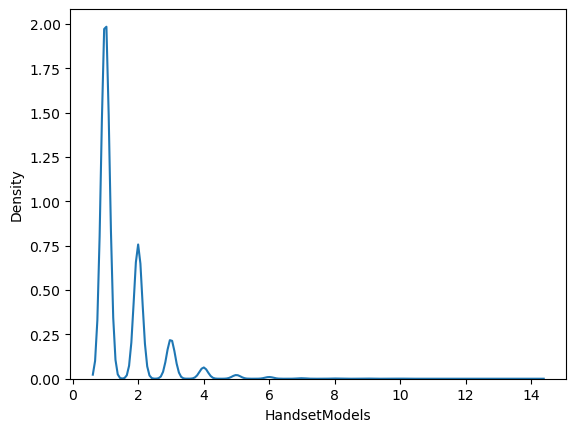

In [72]:
sns.kdeplot(x="HandsetModels", data=Churn1)

<Axes: xlabel='HandsetModels', ylabel='Density'>

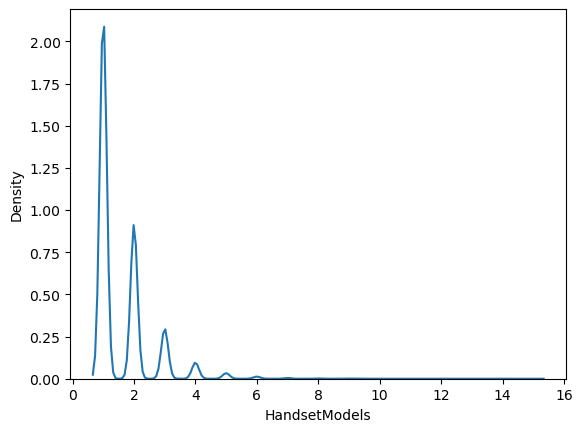

In [73]:
sns.kdeplot(x="HandsetModels", data=Churn0)

<Axes: xlabel='CurrentEquipmentDays', ylabel='Density'>

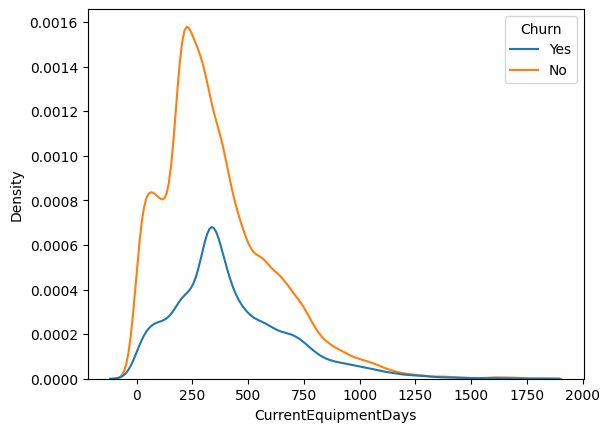

In [13]:
sns.kdeplot(x="CurrentEquipmentDays", data=data,hue='Churn')

<Axes: xlabel='CurrentEquipmentDays', ylabel='Density'>

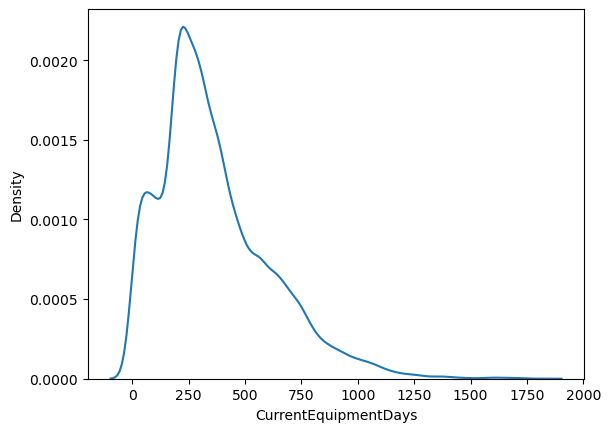

In [75]:
sns.kdeplot(x="CurrentEquipmentDays", data=Churn0)

<Axes: xlabel='AgeHH1', ylabel='Density'>

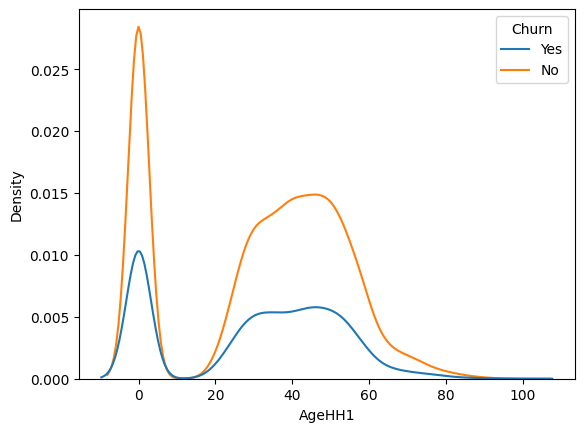

In [14]:
sns.kdeplot(x="AgeHH1", data=data,hue='Churn')

<Axes: xlabel='AgeHH1', ylabel='Density'>

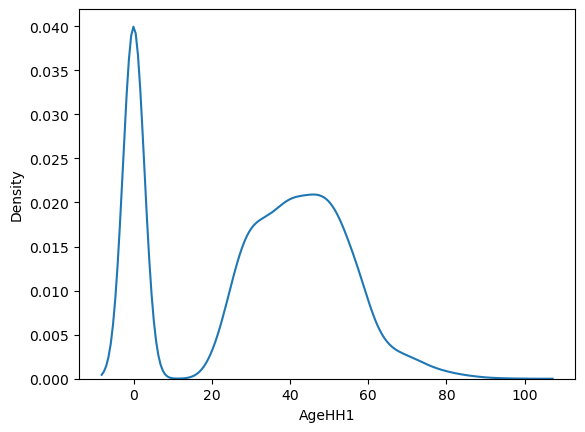

In [77]:
sns.kdeplot(x="AgeHH1", data=Churn0)

<Axes: xlabel='AgeHH2', ylabel='Density'>

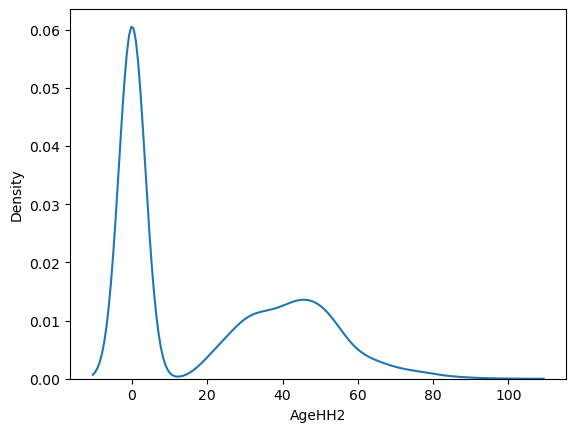

In [78]:
sns.kdeplot(x="AgeHH2", data=Churn1)

<Axes: xlabel='AgeHH2', ylabel='Density'>

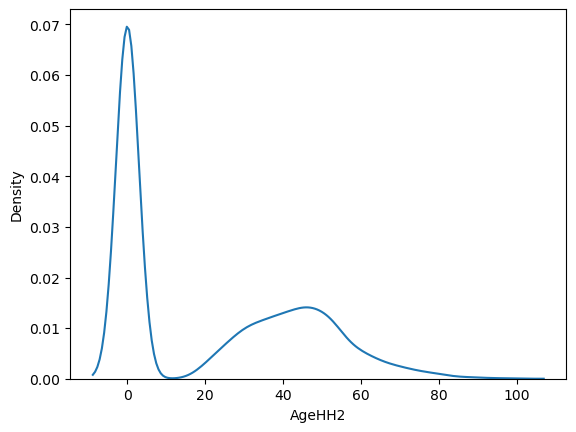

In [79]:
sns.kdeplot(x="AgeHH2", data=Churn0)

<Axes: xlabel='ChildrenInHH', ylabel='count'>

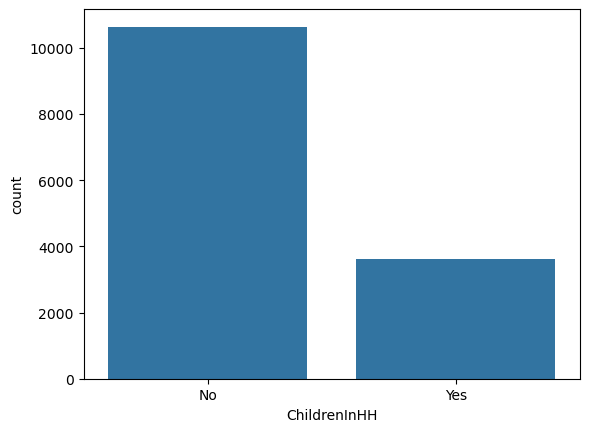

In [81]:
sns.countplot(x="ChildrenInHH", data=Churn1)

<Axes: xlabel='ChildrenInHH', ylabel='count'>

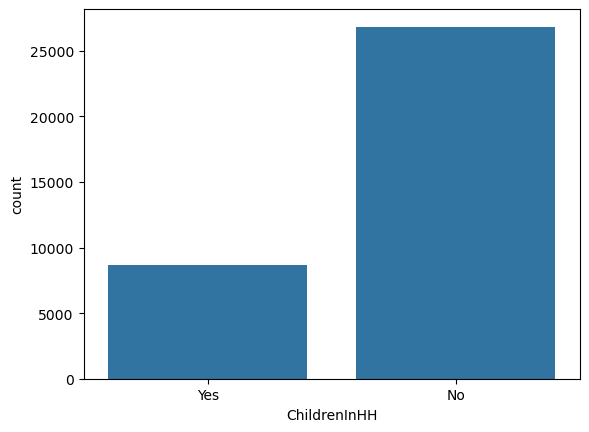

In [83]:
sns.countplot(x="ChildrenInHH", data=Churn0)

<Axes: xlabel='HandsetRefurbished', ylabel='count'>

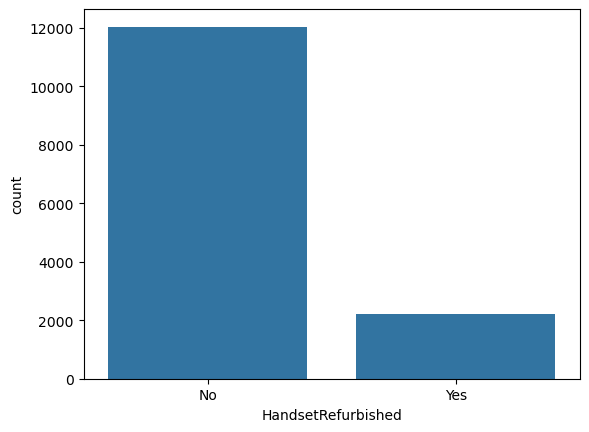

In [84]:
sns.countplot(x="HandsetRefurbished", data=Churn1)

<Axes: xlabel='HandsetRefurbished', ylabel='count'>

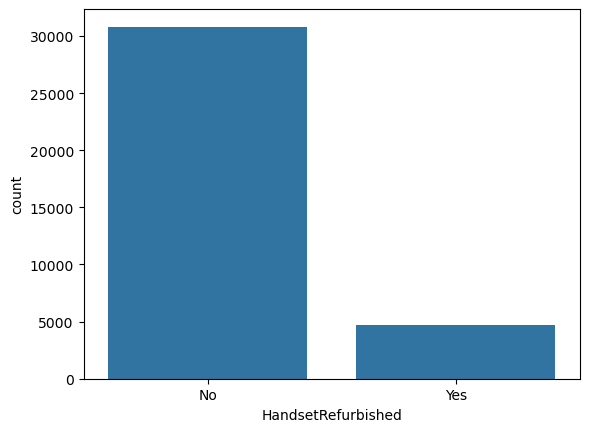

In [85]:
sns.countplot(x="HandsetRefurbished", data=Churn0)

<Axes: xlabel='HandsetWebCapable', ylabel='count'>

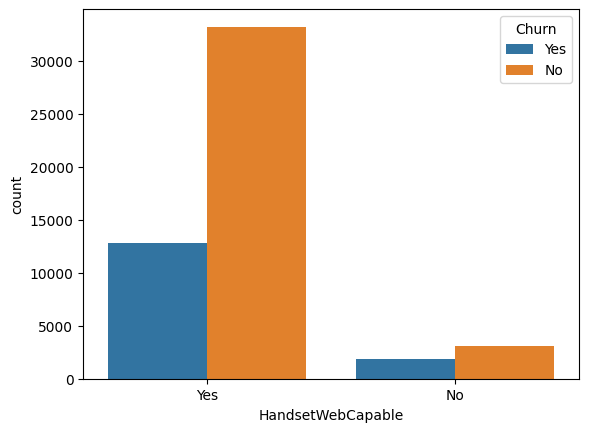

In [22]:
sns.countplot(x="HandsetWebCapable", data=data,hue='Churn')

<Axes: xlabel='HandsetWebCapable', ylabel='count'>

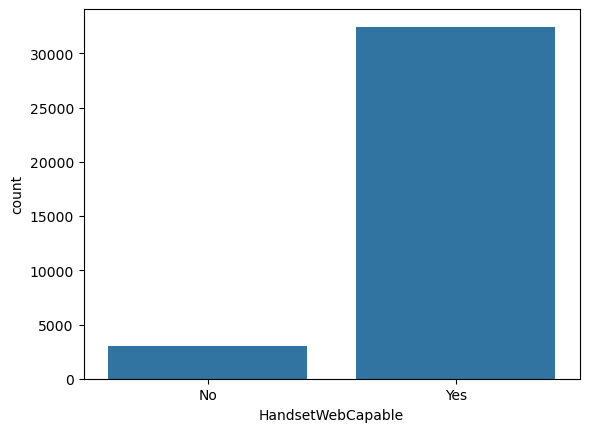

In [87]:
sns.countplot(x="HandsetWebCapable", data=Churn0)

<Axes: xlabel='TruckOwner', ylabel='count'>

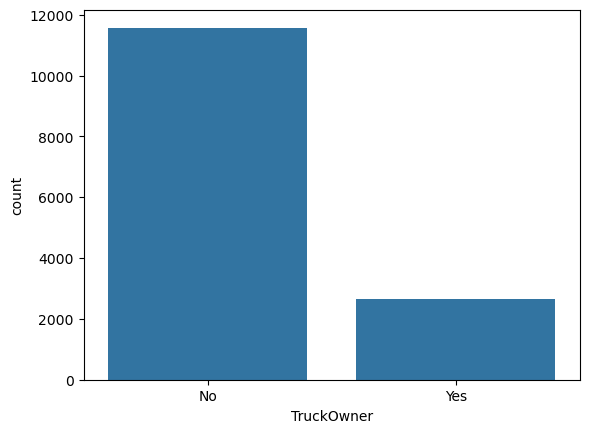

In [88]:
sns.countplot(x="TruckOwner", data=Churn1)

<Axes: xlabel='TruckOwner', ylabel='count'>

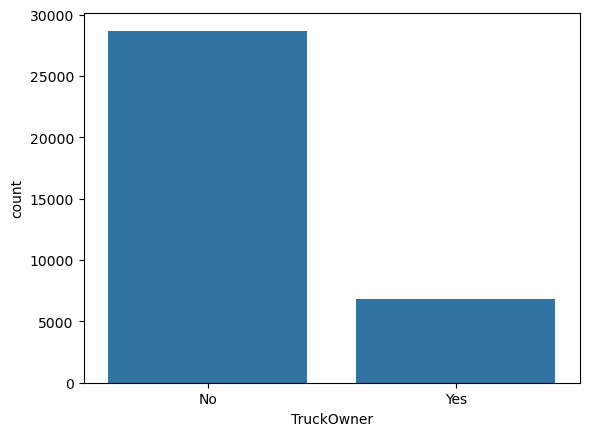

In [89]:
sns.countplot(x="TruckOwner", data=Churn0)

<Axes: xlabel='RVOwner', ylabel='count'>

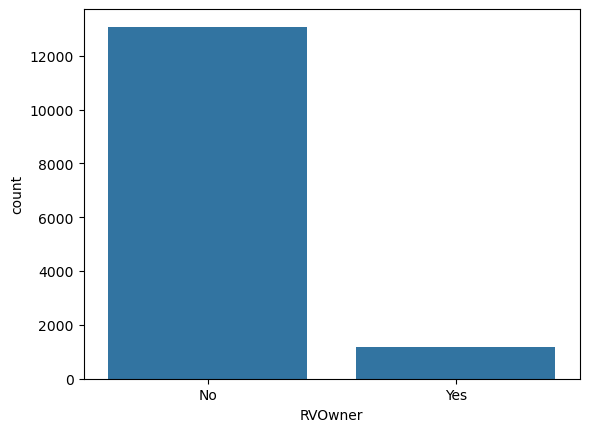

In [90]:
sns.countplot(x="RVOwner", data=Churn1)

<Axes: xlabel='RVOwner', ylabel='count'>

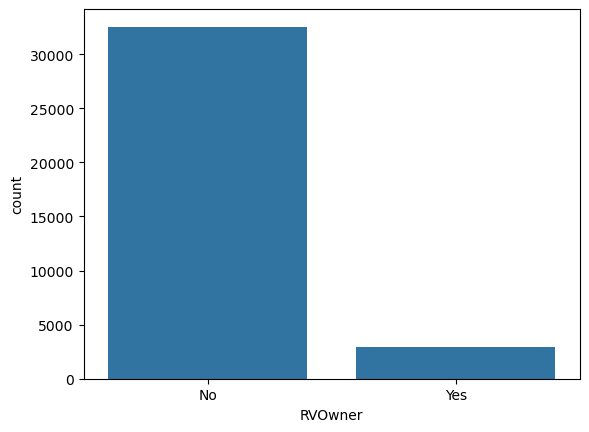

In [91]:
sns.countplot(x="RVOwner", data=Churn0)

<Axes: xlabel='Homeownership', ylabel='count'>

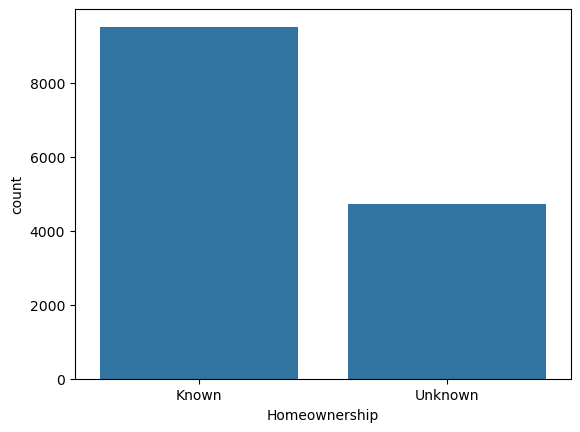

In [92]:
sns.countplot(x="Homeownership", data=Churn1)

<Axes: xlabel='Homeownership', ylabel='count'>

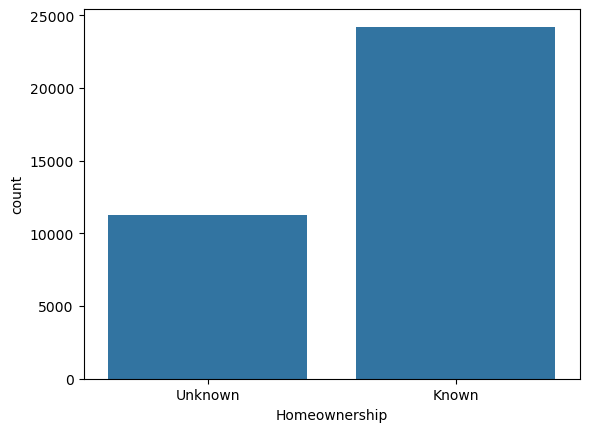

In [93]:
sns.countplot(x="Homeownership", data=Churn0)

<Axes: xlabel='BuysViaMailOrder', ylabel='count'>

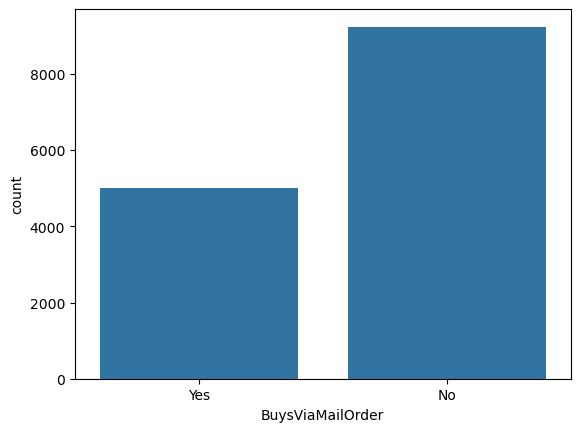

In [94]:
sns.countplot(x="BuysViaMailOrder", data=Churn1)

<Axes: xlabel='BuysViaMailOrder', ylabel='count'>

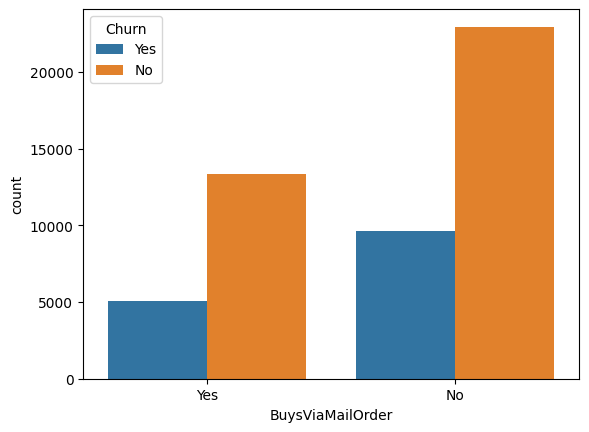

In [21]:
sns.countplot(x="BuysViaMailOrder", data=data,hue='Churn')

<Axes: xlabel='RespondsToMailOffers', ylabel='count'>

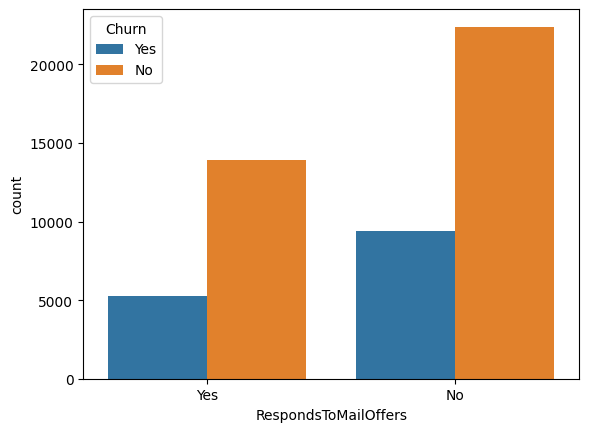

In [20]:
sns.countplot(x="RespondsToMailOffers", data=data,hue='Churn')

<Axes: xlabel='RespondsToMailOffers', ylabel='count'>

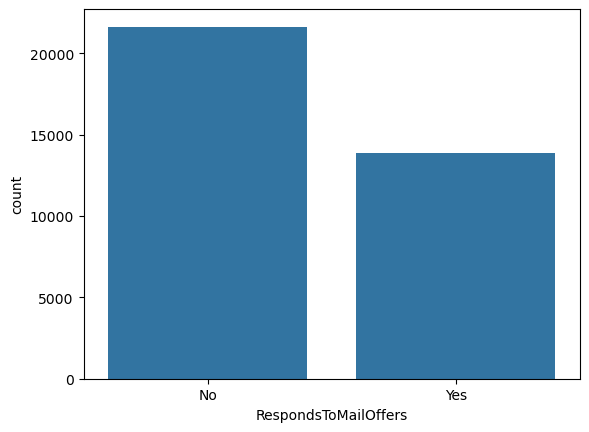

In [97]:
sns.countplot(x="RespondsToMailOffers", data=Churn0)

<Axes: xlabel='OptOutMailings', ylabel='count'>

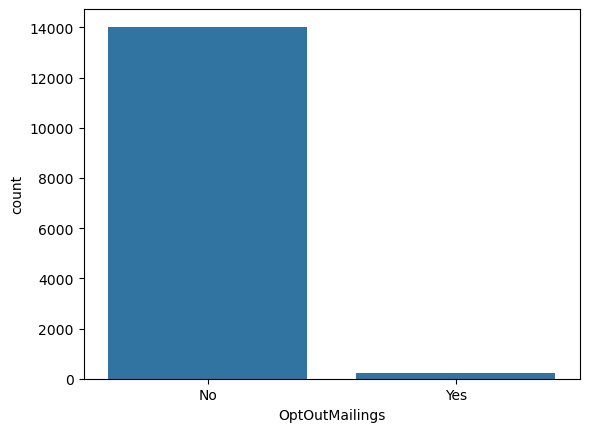

In [98]:
sns.countplot(x="OptOutMailings", data=Churn1)

<Axes: xlabel='OptOutMailings', ylabel='count'>

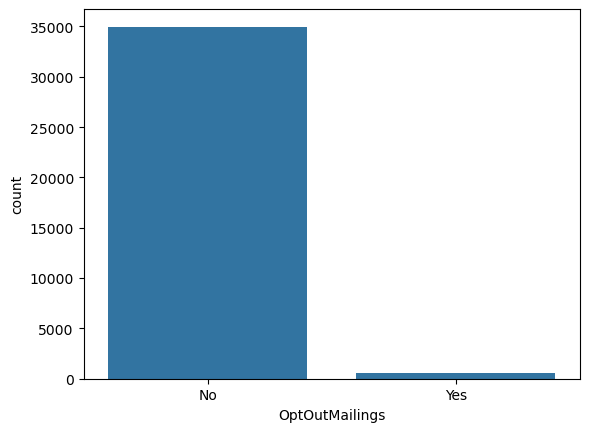

In [99]:
sns.countplot(x="OptOutMailings", data=Churn0)

<Axes: xlabel='NonUSTravel', ylabel='count'>

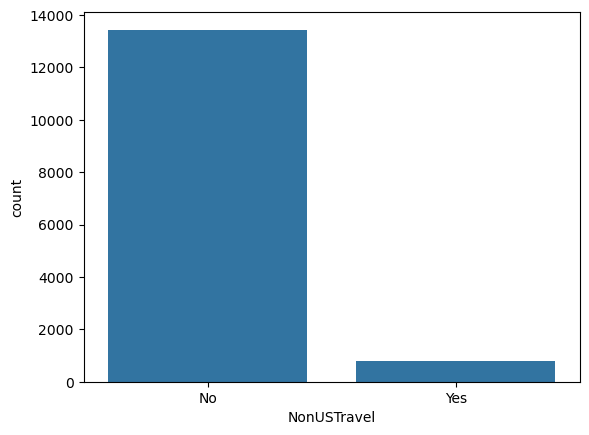

In [100]:
sns.countplot(x="NonUSTravel", data=Churn1)

<Axes: xlabel='NonUSTravel', ylabel='count'>

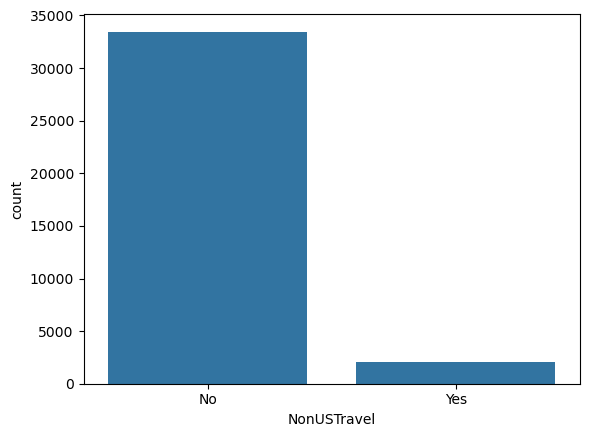

In [101]:
sns.countplot(x="NonUSTravel", data=Churn0)

<Axes: xlabel='OwnsComputer', ylabel='count'>

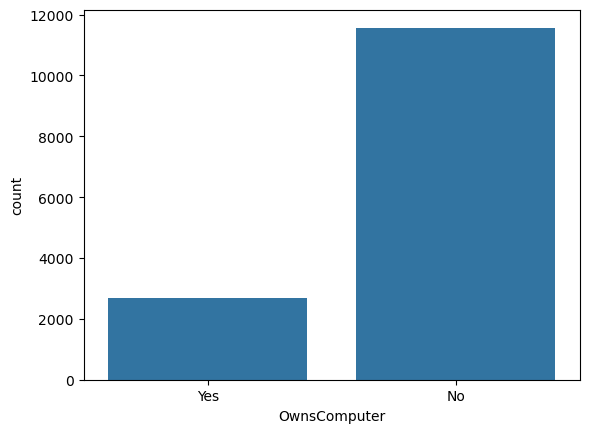

In [102]:
sns.countplot(x="OwnsComputer", data=Churn1)

<Axes: xlabel='OwnsComputer', ylabel='count'>

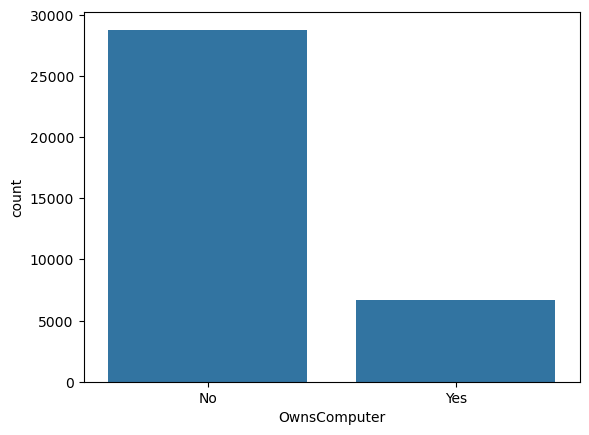

In [103]:
sns.countplot(x="OwnsComputer", data=Churn0)

<Axes: xlabel='HasCreditCard', ylabel='count'>

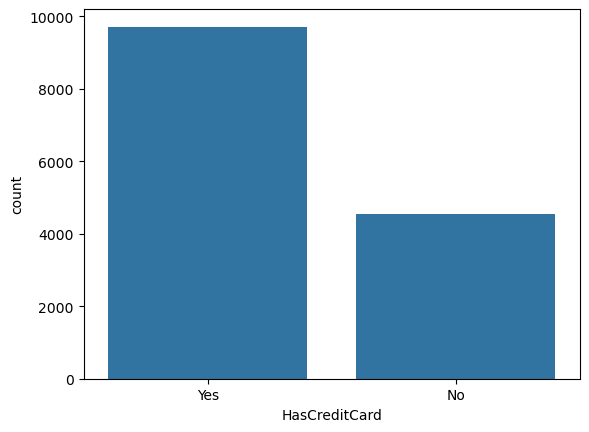

In [104]:
sns.countplot(x="HasCreditCard", data=Churn1)

<Axes: xlabel='HasCreditCard', ylabel='count'>

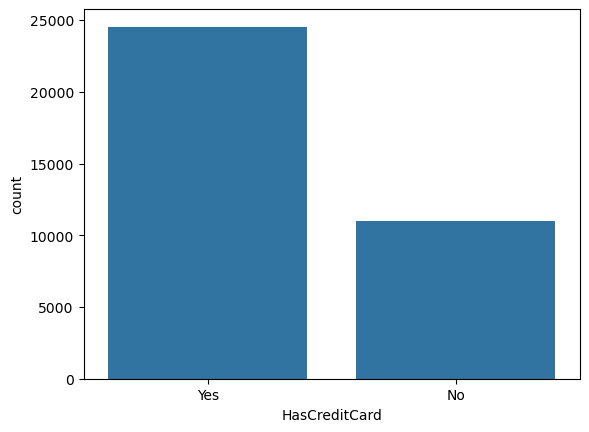

In [105]:
sns.countplot(x="HasCreditCard", data=Churn0)

<Axes: xlabel='RetentionCalls', ylabel='count'>

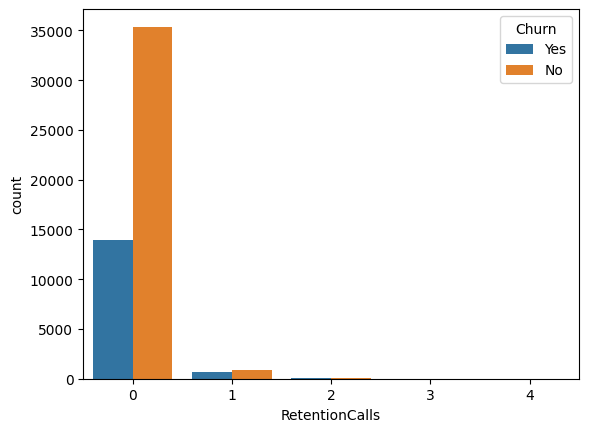

In [19]:
sns.countplot(x="RetentionCalls", data=data,hue='Churn')

<Axes: xlabel='RetentionCalls', ylabel='count'>

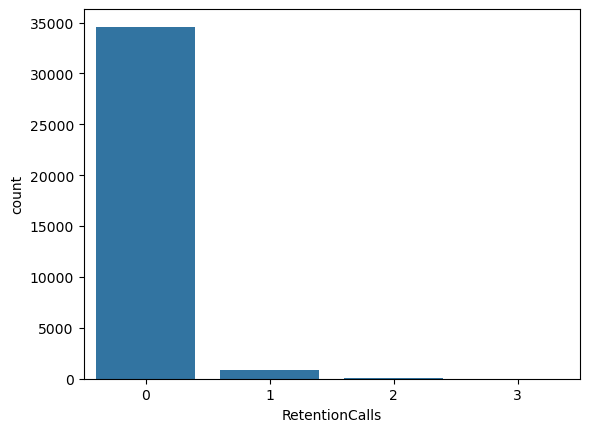

In [107]:
sns.countplot(x="RetentionCalls", data=Churn0)

<Axes: xlabel='RetentionOffersAccepted', ylabel='count'>

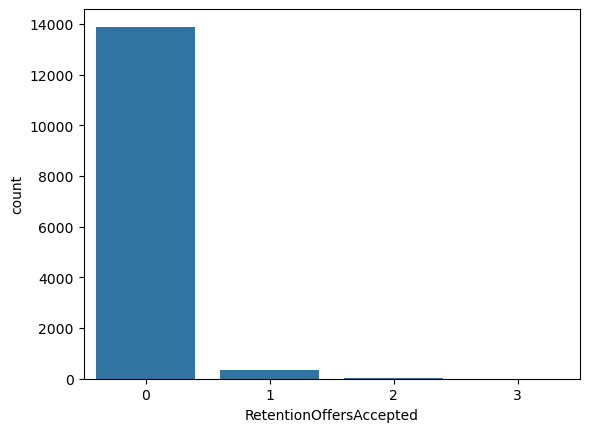

In [108]:
sns.countplot(x="RetentionOffersAccepted", data=Churn1)

<Axes: xlabel='RetentionOffersAccepted', ylabel='count'>

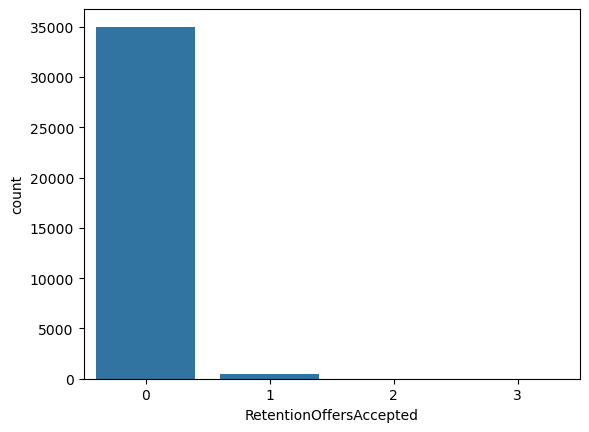

In [109]:
sns.countplot(x="RetentionOffersAccepted", data=Churn0)

<Axes: xlabel='NewCellphoneUser', ylabel='count'>

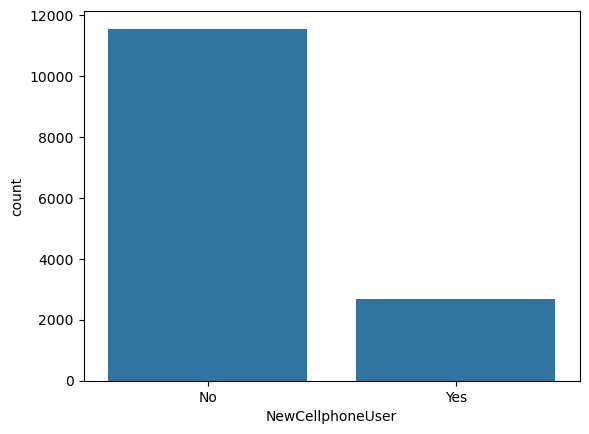

In [110]:
sns.countplot(x="NewCellphoneUser", data=Churn1)

<Axes: xlabel='NewCellphoneUser', ylabel='count'>

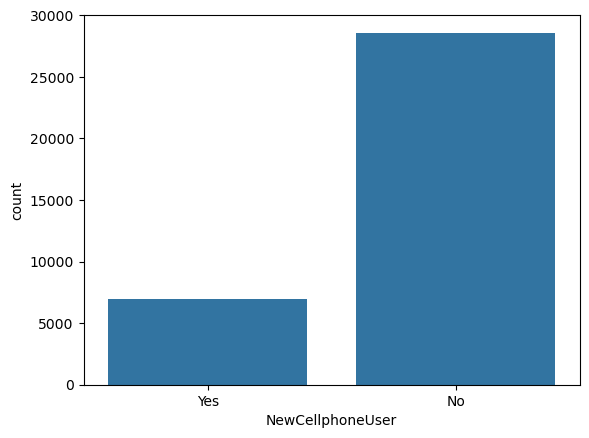

In [111]:
sns.countplot(x="NewCellphoneUser", data=Churn0)

<Axes: xlabel='NotNewCellphoneUser', ylabel='count'>

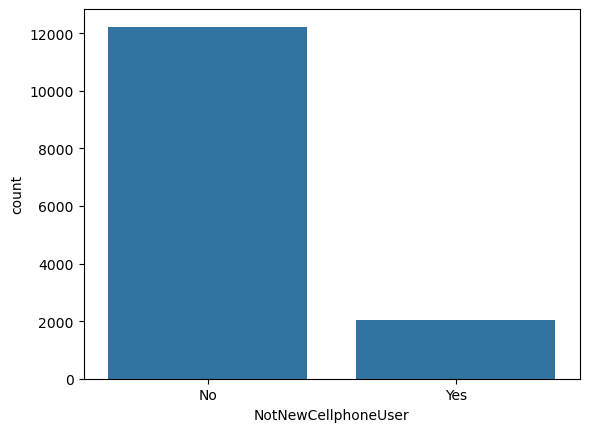

In [112]:
sns.countplot(x="NotNewCellphoneUser", data=Churn1)

<Axes: xlabel='NotNewCellphoneUser', ylabel='count'>

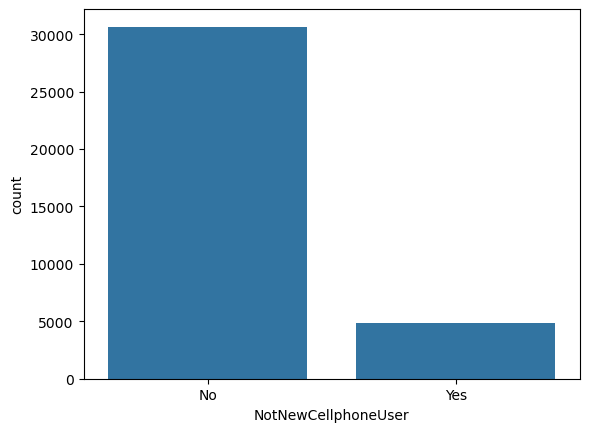

In [113]:
sns.countplot(x="NotNewCellphoneUser", data=Churn0)

<Axes: xlabel='ReferralsMadeBySubscriber', ylabel='count'>

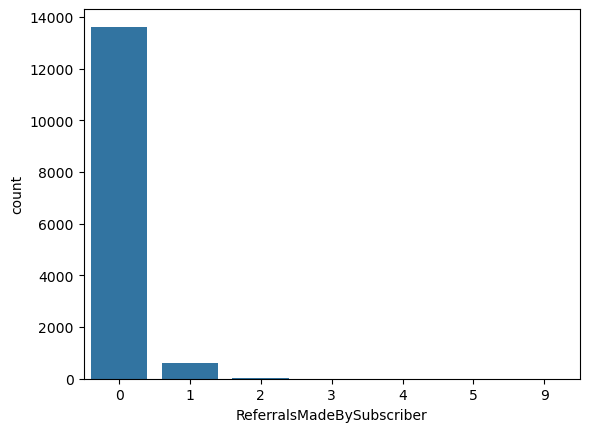

In [114]:
sns.countplot(x="ReferralsMadeBySubscriber", data=Churn1)

<Axes: xlabel='ReferralsMadeBySubscriber', ylabel='count'>

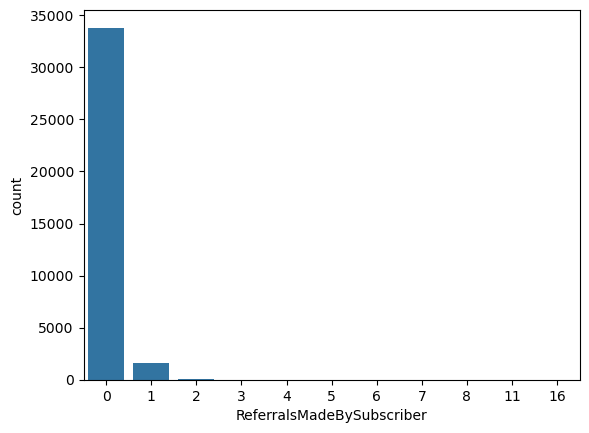

In [115]:
sns.countplot(x="ReferralsMadeBySubscriber", data=Churn0)

<Axes: xlabel='IncomeGroup', ylabel='count'>

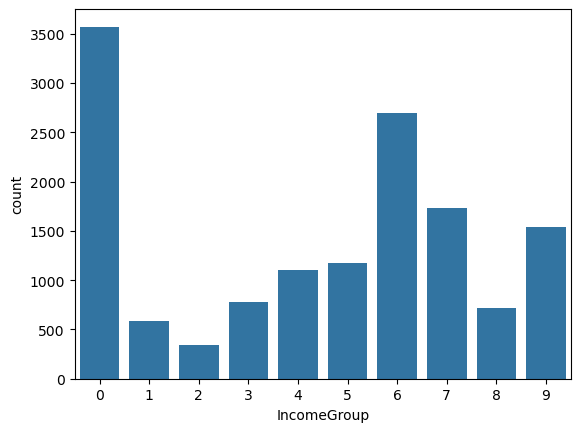

In [116]:
sns.countplot(x="IncomeGroup", data=Churn1)

<Axes: xlabel='IncomeGroup', ylabel='count'>

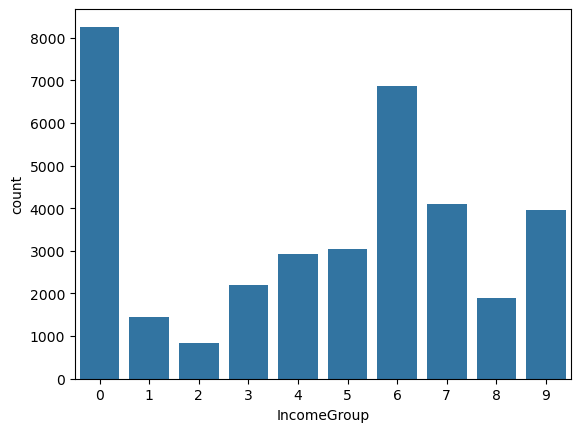

In [117]:
sns.countplot(x="IncomeGroup", data=Churn0)

<Axes: xlabel='OwnsMotorcycle', ylabel='count'>

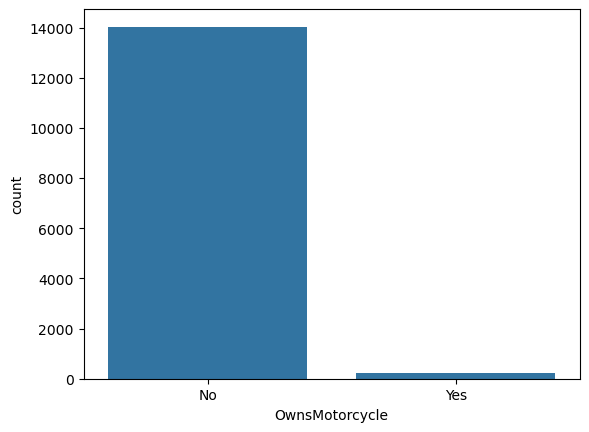

In [118]:
sns.countplot(x="OwnsMotorcycle", data=Churn1)

<Axes: xlabel='OwnsMotorcycle', ylabel='count'>

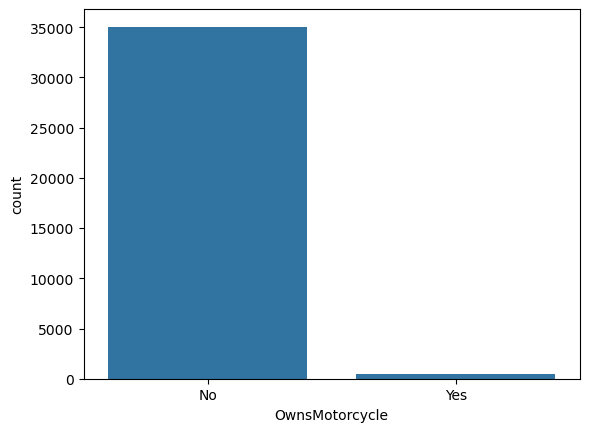

In [119]:
sns.countplot(x="OwnsMotorcycle", data=Churn0)

<Axes: xlabel='AdjustmentsToCreditRating', ylabel='count'>

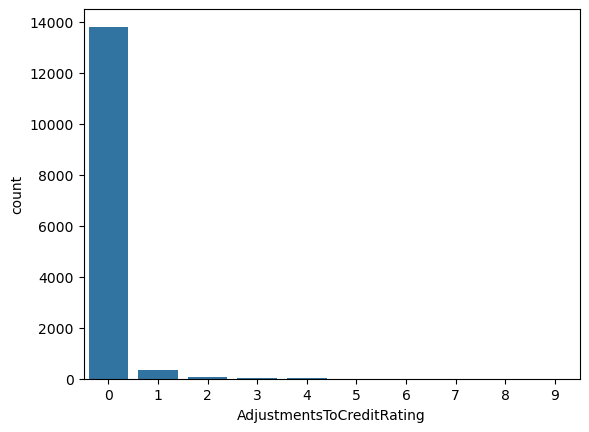

In [120]:
sns.countplot(x="AdjustmentsToCreditRating", data=Churn1)

In [ ]:
data['AdjustmentsToCreditRating']

<Axes: xlabel='AdjustmentsToCreditRating', ylabel='count'>

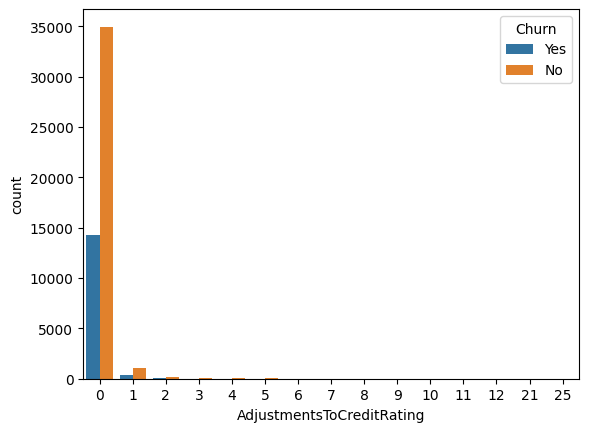

In [15]:
sns.countplot(x="AdjustmentsToCreditRating",  data=data,hue='Churn')

<Axes: xlabel='HandsetPrice', ylabel='count'>

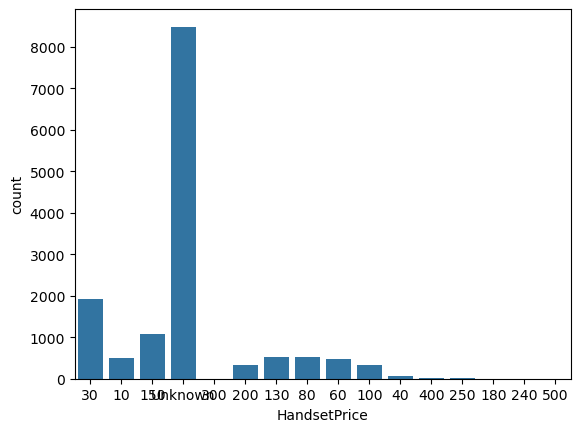

In [122]:
sns.countplot(x="HandsetPrice", data=Churn1)

<Axes: xlabel='HandsetPrice', ylabel='count'>

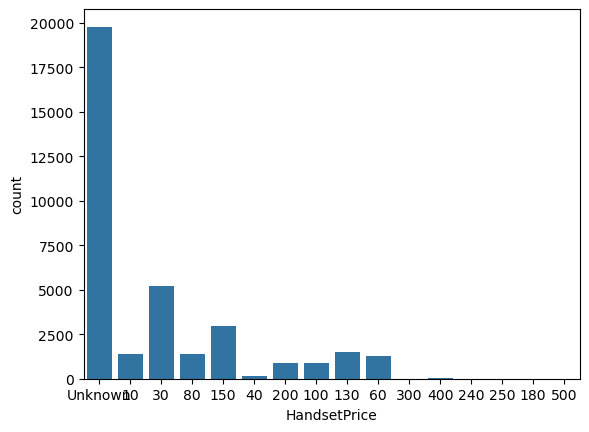

In [123]:
sns.countplot(x="HandsetPrice", data=Churn0)

<Axes: xlabel='MadeCallToRetentionTeam', ylabel='count'>

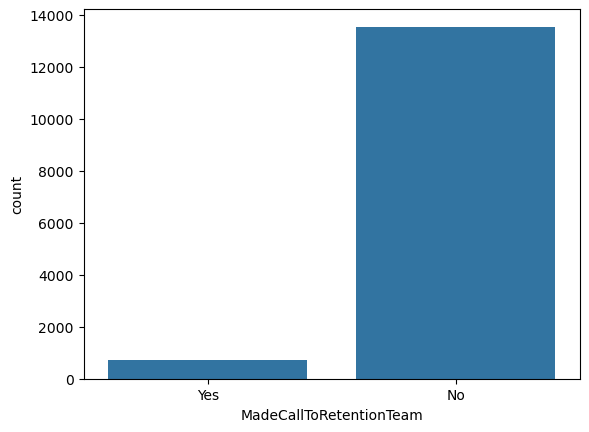

In [124]:
sns.countplot(x="MadeCallToRetentionTeam", data=Churn1)

<Axes: xlabel='MadeCallToRetentionTeam', ylabel='count'>

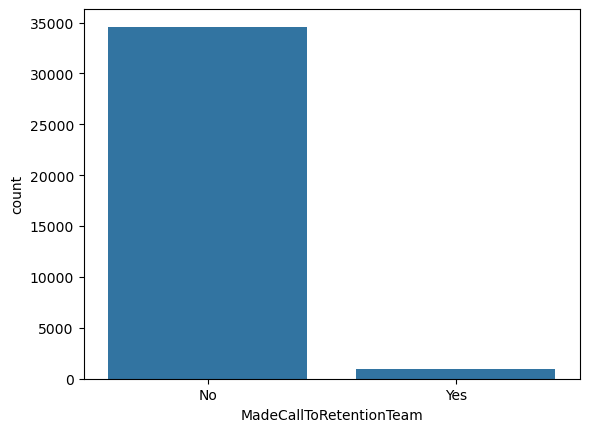

In [125]:
sns.countplot(x="MadeCallToRetentionTeam", data=Churn0)

<Axes: xlabel='CreditRating', ylabel='count'>

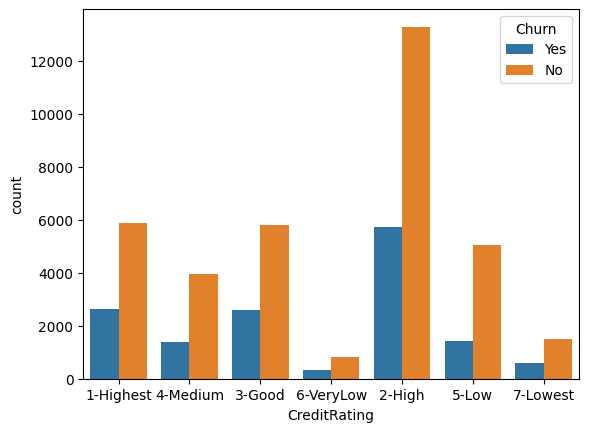

In [16]:
sns.countplot(x="CreditRating",  data=data,hue='Churn')

<Axes: xlabel='CreditRating', ylabel='count'>

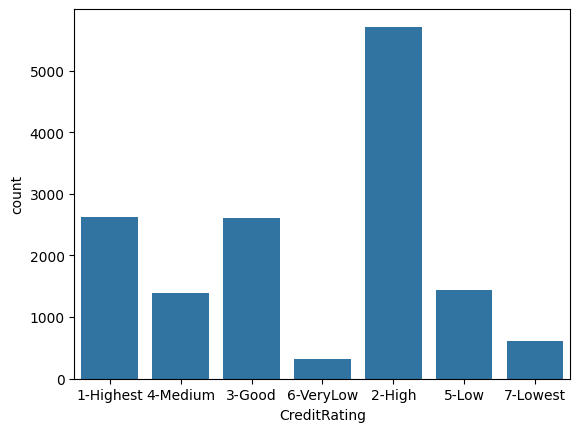

In [18]:
sns.countplot(x="CreditRating", data=Churn1)

<Axes: xlabel='CreditRating', ylabel='count'>

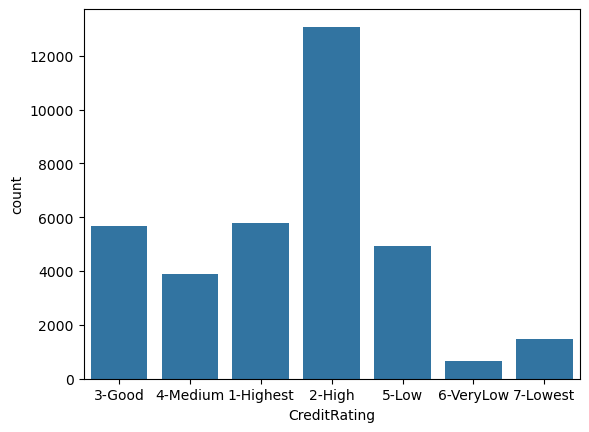

In [127]:
sns.countplot(x="CreditRating", data=Churn0)

<Axes: xlabel='PrizmCode', ylabel='count'>

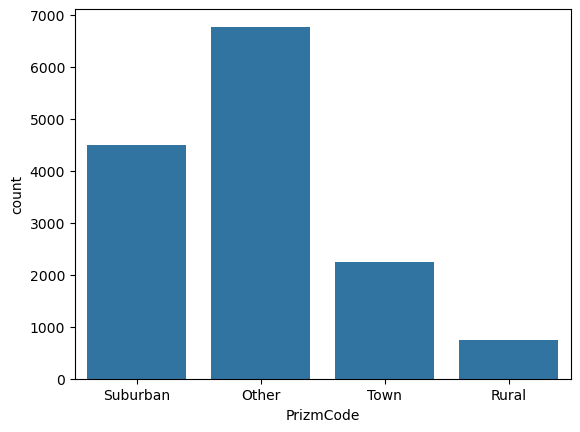

In [128]:
sns.countplot(x="PrizmCode", data=Churn1)

<Axes: xlabel='PrizmCode', ylabel='count'>

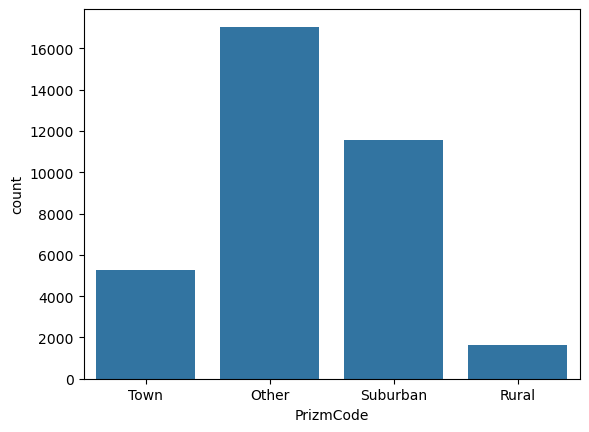

In [129]:
sns.countplot(x="PrizmCode", data=Churn0)

<Axes: xlabel='Occupation', ylabel='count'>

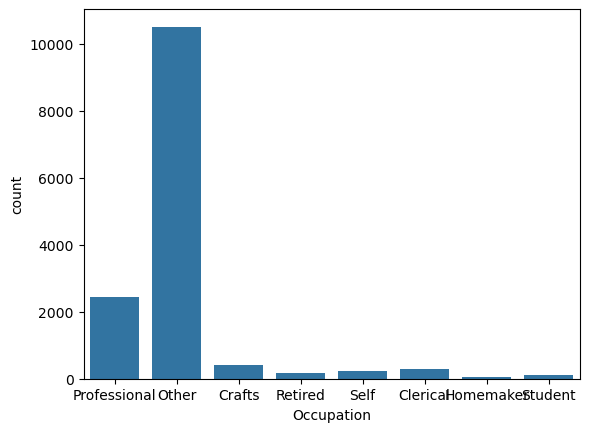

In [130]:
sns.countplot(x="Occupation", data=Churn1)

<Axes: xlabel='Occupation', ylabel='count'>

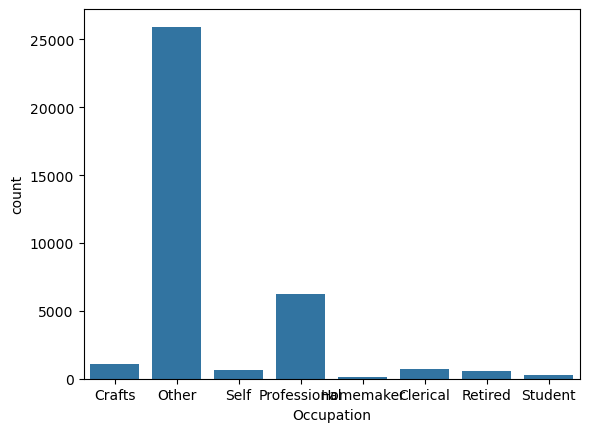

In [131]:
sns.countplot(x="Occupation", data=Churn0)

<Axes: xlabel='MaritalStatus', ylabel='count'>

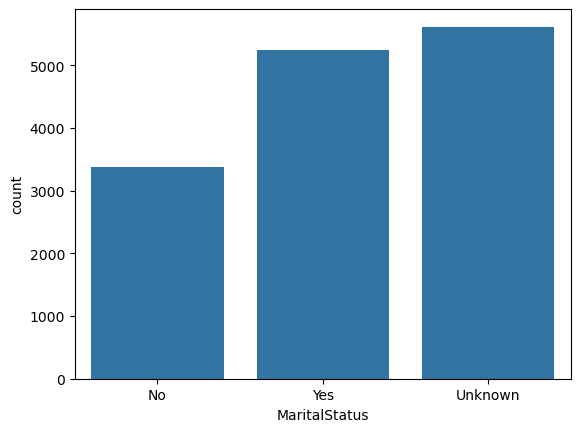

In [132]:
sns.countplot(x="MaritalStatus", data=Churn1)

<Axes: xlabel='MaritalStatus', ylabel='count'>

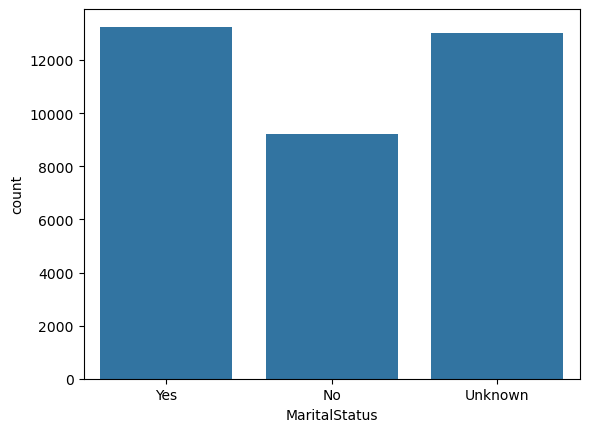

In [133]:
sns.countplot(x="MaritalStatus", data=Churn0)